# <font color = green>`Capstone` - Credit Card Fraud Detection <font>
##### <font color = black> By:<font> 
   <font color = red>    **MOHAMMAD SHAHID RASHID** <font>   <font color = blue>     (mohammad.shahid.rashid@gmail.com) <font> 
   <font color = blue>  - **DS C27** <font>

## <font color = blue>Problem Statement  <font>
 To predict fraudulent credit card transactions with the help of machine learning models. This is to analyse customer-level data that has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group. The data set is taken from the Kaggle website and has a `total of 2,84,807 transactions`; out of these, `492 are fraudulent`. Since the `data set is highly imbalanced`, it needs to be handled before model building.


## <font color = red>Understanding and defining fraud   <font>
Credit card fraud is any dishonest act or behaviour to obtain information without proper authorisation from the account holder for financial gain. Among different ways of committing frauds, skimming is the most common one, which is a way of duplicating information that is located on the magnetic strip of the card. Apart from this, the other ways are as follows:

- Manipulation/alteration of genuine cards
- Creation of counterfeit cards
- Stealing/loss of credit cards
- Fraudulent telemarketing


## <font color = black>Project pipeline  <font>
The project pipeline can be briefly summarised in the following five steps:

`Data Understanding`: Here, you need to load the data and understand the features present in it. This would help you choose the features that you will need for your final model.
    
`Exploratory data analytics (EDA)`: Normally, in this step, you need to perform univariate and bivariate analyses of the data, followed by feature transformations, if necessary. For the current data set, because Gaussian variables are used, you do not need to perform Z-scaling. However, you can check whether there is any skewness in the data and try to mitigate it, as it might cause problems during the model building phase.
    
`Train/Test split`: Now, you are familiar with the train/test split that you can perform to check the performance of your models with unseen data. Here, for validation, you can use the k-fold cross-validation method. You need to choose an appropriate k value so that the minority class is correctly represented in the test folds.
    
`Model building / hyperparameter tuning`: This is the final step at which you can try different models and fine-tune their hyperparameters until you get the desired level of performance on the given data set. You should try and check if you get a better model by various sampling techniques.
    
`Model evaluation`: Evaluate the models using appropriate evaluation metrics. Note that since the data is imbalanced, it is is more important to identify the fraudulent transactions accurately than the non-fraudulent ones. Choose an appropriate evaluation metric that reflects this business goal.

**<font color="blue">Input Data:</font>**
- `https://www.kaggle.com/mlg-ulb/creditcardfraud`

    
## <font color = red> Business Goal  <font>

 
For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.

It has been estimated by Nilson Report that by 2020, banking frauds would account for $30 billion worldwide. With the rise in digital payment channels, the number of fraudulent transactions is also increasing in new and different ways. 

# <font color = black> Design flow will be as below <font> 

#### <font color = red> Milestone step 1  <font> - `Reading & Understanding data`
- shape
- info
- describe
- Missing values

#### <font color = red> Milestone step 2  <font> - `EDA`
- Bar plot Fraud vs non-fraud share
- Outlier Treatment 
- Distribution plot Fraud vs non-fraud share
   - classes with `time`
   - classes with `amount`

#### <font color = red> Milestone step 3  <font> - `Data Preperation`
- Train Test split
- Feature Scaling
- Checking the Skewness
- Mitigate skweness with PowerTransformer

#### <font color = red> Milestone step 4  <font> - `Building Model  and evaluating Model ( on imbalanced data set )`
- Logistic regression
- Decision Tree
- Random forest
- XGBoost
- SVM
- KNN

#### <font color = red> Milestone step 5  <font> - `Choosing best model on the imbalanced data`    

#### <font color = red> Milestone step 6  <font> - `Handling data imbalance and process each model of Milestone step 7 on each imbalance technique one by one`
- Undersampling
- Oversampling
- SMOTE (Synthetic Minority Oversampling Technique)
- AdaSyn (Adaptive Synthetic Sampling)

#### <font color = red> Milestone step 7  <font> - `Building and evaluating Model ( on balanced data set )`
- Logistic regression
- Decision Tree
- Random forest
- XGBoost
- SVM
- KNN

#### <font color = red> Milestone step 8  <font> - `Choosing best model on the balanced data`

#### <font color = red> Milestone step 9  <font> - `Business Summary Report`


## <font color="green">========================================================================== </font>
## <center> <font color="blue">                       Lets start the capstone project as per the above mentioned designed                     </font> </center>
## <font color="green">========================================================================== </font>

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter(action="ignore", category=FutureWarning)

In [3]:
# Import the numpy and pandas package
import os
import numpy as np
import pandas as pd

#Set display setting
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_colwidth', -1) # make sure data and columns are displayed correctly withput purge

#Visualising
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#scikit-learn library
from sklearn import metrics
from sklearn import preprocessing


# <font color = red> Milestone step 1  <font> - `Reading & Understanding data`
    - shape
    - info
    - describe
    - Missing values

In [9]:
df_cc = pd.read_csv(r'E:\Upgrad\Masters Program in Data Science\5. Capastone Project\Capastone Submission\creditcard.csv')
df_cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
df_cc.shape

(284807, 31)

In [11]:
df_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [12]:
df_cc.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [19]:
# Features with Missing values %
df_cc_miss_cols = (round(((df_cc.isnull().sum()/len(df_cc.index))*100),2).to_frame('Null %')).sort_values('Null %')
df_cc_miss_cols

,Null %
Time,0.0
V28,0.0
V27,0.0
V26,0.0
V25,0.0
V24,0.0
V23,0.0
V22,0.0
V21,0.0
V20,0.0


From the above check we could confirm there are no missing values in any of the features henceforth we are good with null values check

In [20]:
# lets check class distribution 
clas = df_cc['Class'].value_counts()
clas

0    284315
1    492   
Name: Class, dtype: int64

In [22]:
# As mentioned 0 is non-fraud and 1 is fraud, so lets check thier percentage

NonFraud_share = round((clas[0]/df_cc['Class'].count()*100),2)
NonFraud_share

99.83

In [23]:
Fraud_share = round((clas[1]/df_cc['Class'].count()*100),2)
Fraud_share

0.17

From the above analysis this clearly says class imbalance problem, lets first build the model on imbalance data and later we will handle data imbalance

# <font color = red> Milestone step 2  <font> - `EDA`
- Bar plot Fraud vs non-fraud share
- Outlier Treatment 
- Distribution plot Fraud vs non-fraud share
   - classes with `time`
   - classes with `amount`

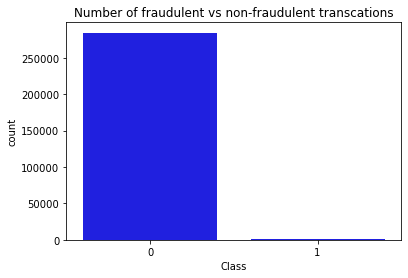

In [27]:
# Bar plot for the number of fraudulent vs non-fraudulent transcations
sns.countplot(x='Class', data=df_cc,color='blue')
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()

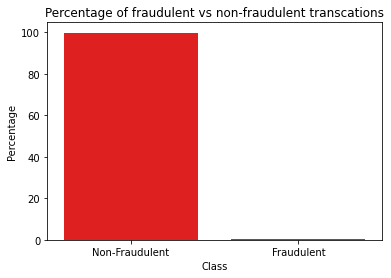

In [26]:
# Bar plot for the percentage of fraudulent vs non-fraudulent transcations
fraud_percent = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[NonFraud_share, Fraud_share]} 
df_fraud_percent = pd.DataFrame(fraud_percent) 
sns.barplot(x='Class',y='Percentage', data=df_fraud_percent,color='red')
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
plt.show()

*Outlier Treatment* :- We could see the data is highly imbalance and any outlier will hardly make any difference, infact outliers treateement to the fraud data will lose expensive data. While we will do hyper pramater tunning, multi cross validation and data transformation at different stage will consume the data outliers.

#### Lets observe the distribution of classes with the `time`

In [28]:
# Creating fraudulent dataframe
data_fraud = df_cc[df_cc['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df_cc[df_cc['Class'] == 0]

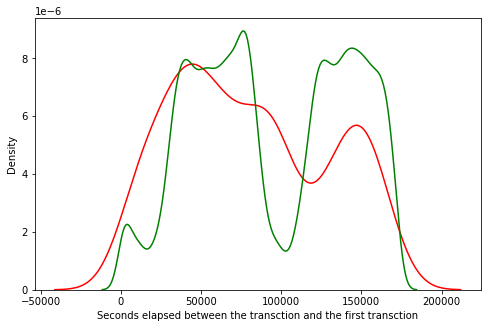

In [32]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False,color='red')
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False,color='green')
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

`Observation on Time` :- Above graph does not tell us any specific pattern for fraud and non-fraudent transaction w.r.t Time, so better drop this feature from the databset

In [33]:
# Dropping the Time column
df_cc.drop('Time', axis=1, inplace=True)

In [34]:
df_cc.shape

(284807, 30)

#### Lets observe the distribution of classes with the `amount`

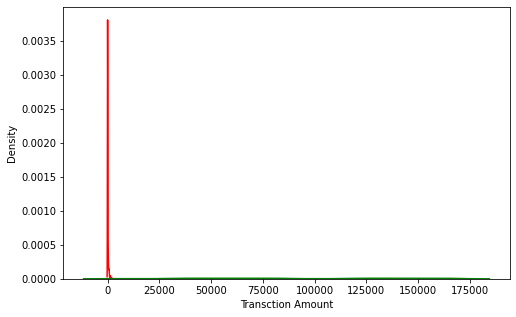

In [35]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Amount'],label='fraudulent',hist=False,color='red')
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False,color='green')
ax.set(xlabel='Transction Amount')
plt.show()

`Observation on Amount` :- Above graph mentiond mostly densly fruad transaction are for lower amount however non-fraudent transation are spread overevery range. As data is exensive and removing some portion will influence the model accuracy, so better let this feature remain in the model.

# <font color = red> Milestone step 3  <font> - `Data Preperation`
- Train Test split
- Feature Scaling
- Checking the Skewness
- Mitigate skweness with PowerTransformer

##### Train-Test Split

In [36]:
# Import the library
from sklearn.model_selection import train_test_split

In [37]:
# As class is target variable, so capturing all feature variables in x
X = df_cc.drop(['Class'], axis=1)

In [38]:
# Capturing target variable to y
y = df_cc['Class']

In [39]:
# split train and test with 0.8 and 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

#### Feature scalling, we just need `Amount` features to scale as rest are fine due to those are scalled already by PCA transformation

In [43]:
# We will use Standard scaler technique to scale this vairable
# Standardization method
from sklearn.preprocessing import StandardScaler

In [44]:
# Instantiate the Scaler
scaler = StandardScaler()

In [45]:
# scaler fit the data and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [46]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
201788,2.023734,-0.429219,-0.691061,-0.201461,-0.162486,0.283718,-0.674694,0.192230,1.124319,-0.037763,0.308648,0.875063,-0.009562,0.116038,0.086537,0.628337,-0.997868,0.482547,0.576077,-0.171390,-0.195207,-0.477813,0.340513,0.059174,-0.431015,-0.297028,-0.000063,-0.046947,-0.345273
179369,-0.145286,0.736735,0.543226,0.892662,0.350846,0.089253,0.626708,-0.049137,-0.732566,0.297692,0.519027,0.041275,-0.690783,0.647121,0.526333,-1.098558,0.511739,0.243984,3.349611,0.206709,-0.124288,-0.263560,-0.110568,-0.434224,-0.509076,0.719784,-0.006357,0.146053,-0.206439
73138,-3.015846,-1.920606,1.229574,0.721577,1.089918,-0.195727,-0.462586,0.919341,-0.612193,-0.966197,1.106534,1.026421,-0.474229,0.641488,-0.430684,-0.631257,0.634633,-0.718062,-0.039929,0.842838,0.274911,-0.319550,0.212891,-0.268792,0.241190,0.318445,-0.100726,-0.365257,0.358043
208679,1.851980,-1.007445,-1.499762,-0.220770,-0.568376,-1.232633,0.248573,-0.539483,-0.813368,0.785431,-0.784316,0.673626,1.428269,0.043937,-0.309507,-1.805728,-0.012118,0.377096,-0.658353,-0.196551,-0.406722,-0.899081,0.137370,0.075894,-0.244027,0.455618,-0.094066,-0.031488,0.362400
206534,2.237844,-0.551513,-1.426515,-0.924369,-0.401734,-1.438232,-0.119942,-0.449263,-0.717258,0.851668,-0.497634,-0.445482,0.324575,0.125543,0.266588,0.802640,0.225312,-1.865494,0.621879,-0.045417,0.050447,0.125601,0.215531,-0.080485,-0.063975,-0.307176,-0.042838,-0.063872,-0.316109


In [47]:
#Scaling of test data can be directly scal transofrm
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49089,1.229452,-0.235478,-0.627166,0.419877,1.797014,4.069574,-0.896223,1.036103,0.745991,-0.147304,-0.850459,0.397845,-0.259849,-0.277065,-0.766810,-0.200946,-0.338122,0.006032,0.477431,-0.057922,-0.170060,-0.288750,-0.130270,1.025935,0.847990,-0.271476,0.060052,0.018104,-0.340485
154704,2.016893,-0.088751,-2.989257,-0.142575,2.675427,3.332289,-0.652336,0.752811,1.962566,-1.025024,1.126976,-2.418093,1.250341,-0.056209,-0.736695,0.014783,1.890249,0.333755,-0.450398,-0.147619,-0.184153,-0.089661,0.087188,0.570679,0.101899,0.620842,-0.048958,-0.042831,-0.320859
67247,0.535093,-1.469185,0.868279,0.385462,-1.439135,0.368118,-0.499370,0.303698,1.042073,-0.437209,1.145725,0.907573,-1.095634,-0.055080,-0.621880,-0.191066,0.311988,-0.478635,0.231159,0.437685,0.028010,-0.384708,-0.128376,0.286638,-0.136700,0.913904,-0.083364,0.052485,0.853442
251657,2.128486,-0.117215,-1.513910,0.166456,0.359070,-0.540072,0.116023,-0.216140,0.680314,0.079977,-1.705327,-0.127579,-0.207945,0.307878,0.213491,0.163032,-0.587029,-0.561292,0.472667,-0.227278,-0.357993,-0.905085,0.223474,-1.075605,-0.188519,0.267672,-0.071733,-0.072238,-0.344410
201903,0.558593,1.587908,-2.368767,5.124413,2.171788,-0.500419,1.059829,-0.254233,-1.959060,0.948915,-0.288169,-1.007647,0.470316,-2.771902,0.221958,0.354333,2.603189,1.092576,0.668084,0.249457,-0.035049,0.271455,0.381606,0.332001,-0.334757,0.448890,0.168585,0.004955,-0.229480


#### Checking the Skewness

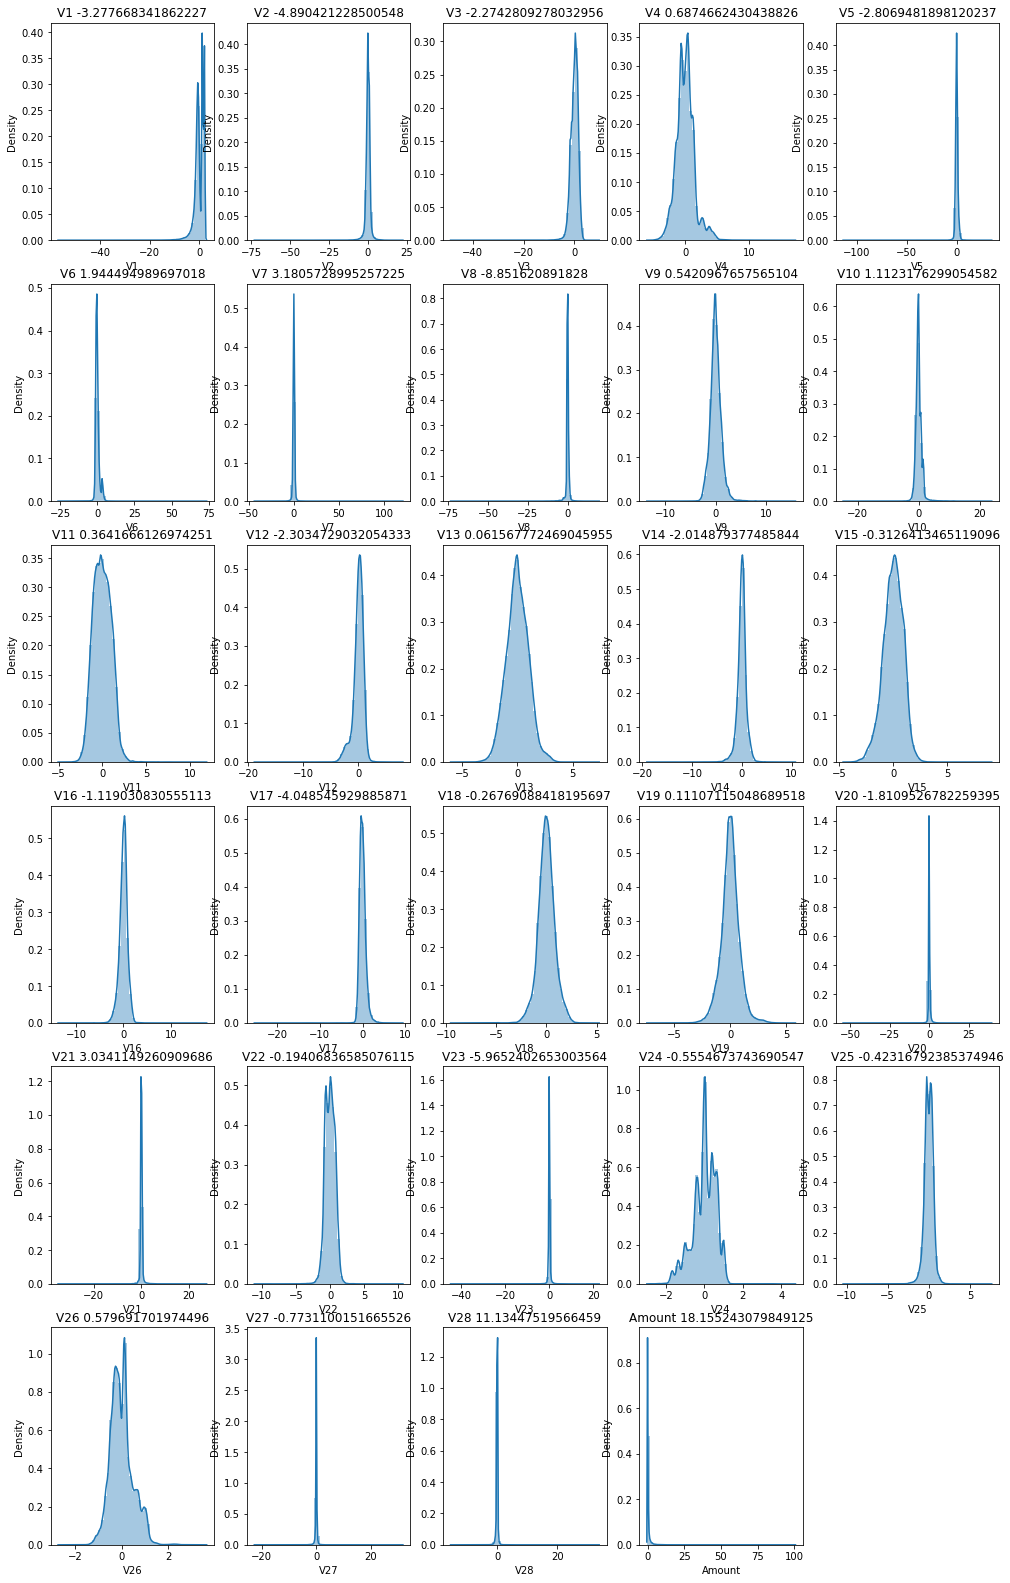

In [48]:

colX = X_train.columns
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in colX :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

Few features you can see are heavily skewed henceforth we first need to mitigate the skewness and make them into normal distribution.

#### Mitigate skweness with PowerTransformer

In [49]:
# Importing PowerTransformer library
from sklearn.preprocessing import PowerTransformer
# Initiate powertransformer
PT = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
X_train[colX] = PT.fit_transform(X_train)
# Transform the test set
X_test[colX] = PT.transform(X_test)

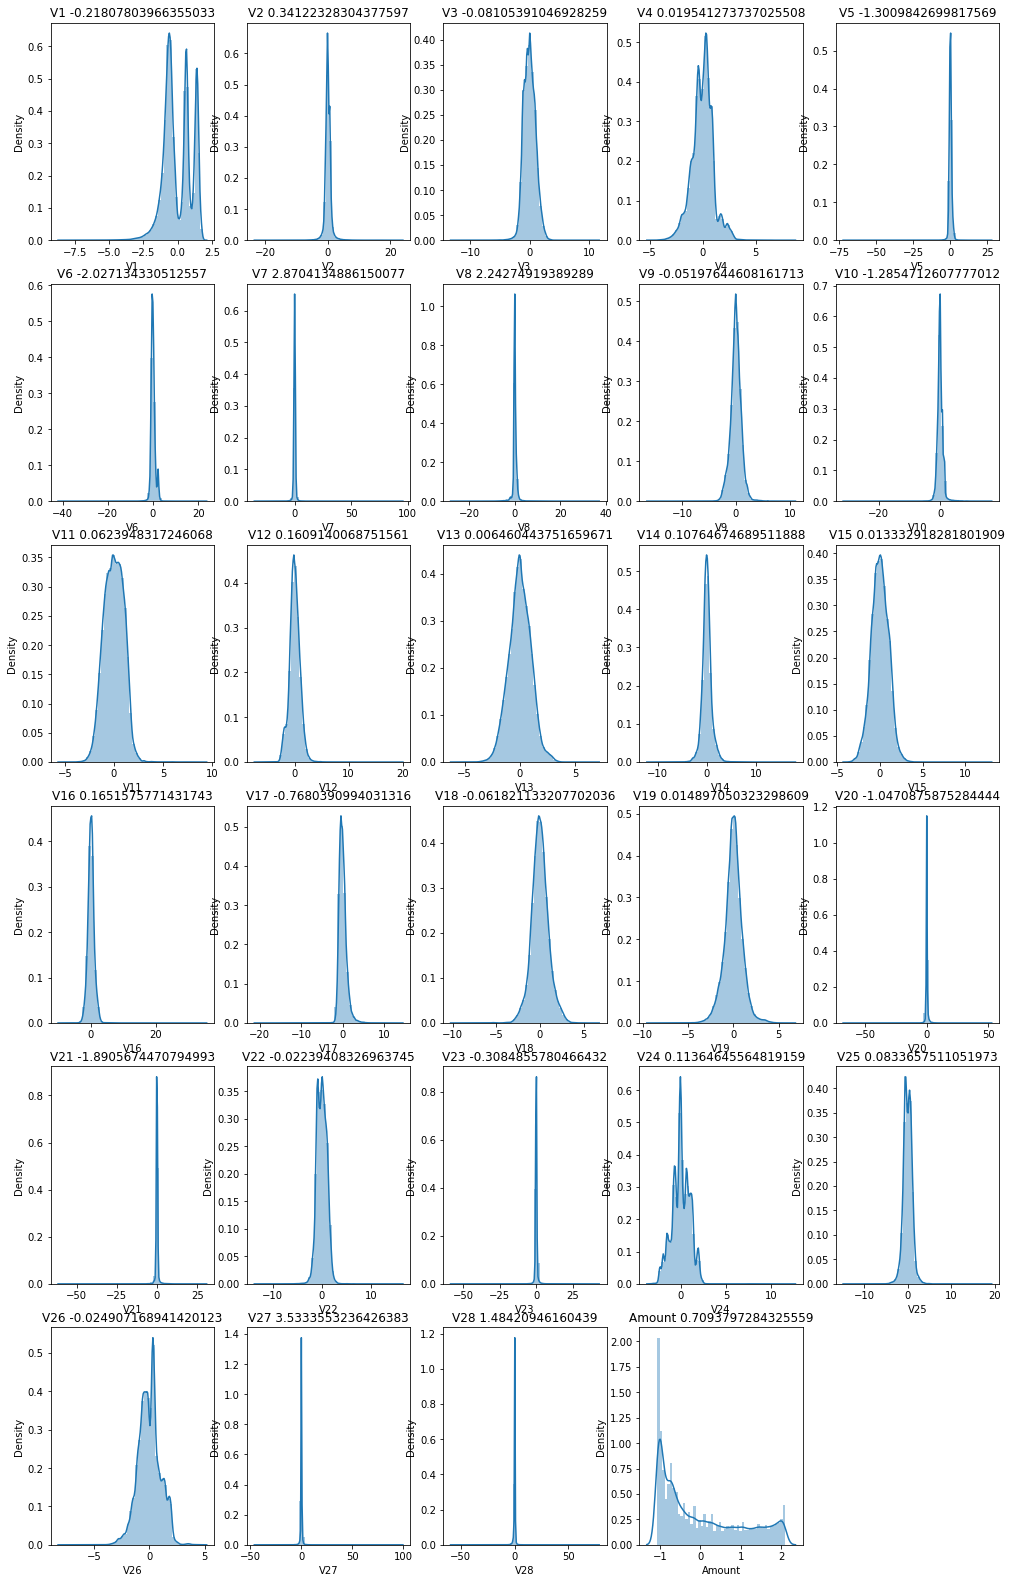

In [50]:
# Plotting the distribution of the variables (skewness) of all the varaibles
k=0
plt.figure(figsize=(17,28))
for col in colX :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

We can see all features are normally distributed after the transformation

### <font color = red> Milestone step 4  <font> - `Building Model  and evaluating Model ( on imbalanced data set )`
- Logistic regression
- Decision Tree
- Random forest
- XGBoost
- SVM
- KNN

### Logistic regression

In [52]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [53]:
# Impoting metrics module
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [54]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [55]:
# Creating KFold object with 5 splits, and C paramters set as 0.01,0.1,1,10,100,1000 , and identify optimum value of C
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [56]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.958052,0.139690,0.043740,0.033363,0.01,{'C': 0.01},0.986856,0.987234,0.968390,0.982373,0.993743,0.983719,0.008479,1,0.984043,0.984587,0.988474,0.985596,0.983075,0.985155,0.001849
1,1.220036,0.063937,0.046303,0.040488,0.1,{'C': 0.1},0.986104,0.987144,0.960929,0.980620,0.992284,0.981416,0.010893,2,0.982402,0.983785,0.987917,0.984018,0.981187,0.983862,0.002270
2,1.387502,0.153242,0.032191,0.011901,1,{'C': 1},0.985834,0.986806,0.958452,0.979781,0.991548,0.980484,0.011635,3,0.981722,0.983322,0.987492,0.983305,0.980489,0.983266,0.002365
3,1.464146,0.107130,0.024049,0.006617,10,{'C': 10},0.985798,0.986754,0.958181,0.979674,0.991467,0.980375,0.011715,4,0.981632,0.983262,0.987435,0.983216,0.980404,0.983190,0.002375
4,1.299025,0.104860,0.024984,0.007647,100,{'C': 100},0.985793,0.986748,0.958155,0.979666,0.991461,0.980365,0.011722,5,0.981625,0.983256,0.987429,0.983207,0.980396,0.983182,0.002376
5,1.332503,0.166590,0.020013,0.006128,1000,{'C': 1000},0.985793,0.986747,0.958153,0.979663,0.991461,0.980363,0.011723,6,0.981623,0.983256,0.987428,0.983206,0.980395,0.983182,0.002376


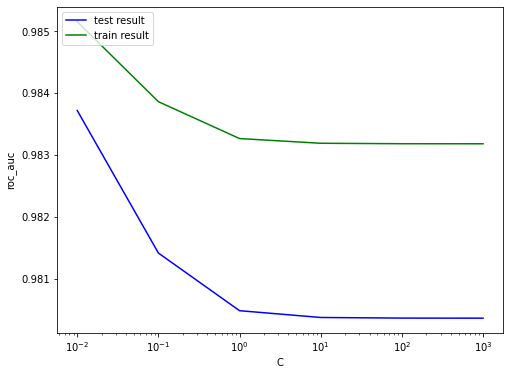

In [57]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'],color='blue')
plt.plot(cv_results['param_C'], cv_results['mean_train_score'],color='green')
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [58]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9837192853831933 at C = 0.01


We got the optimal value of c = 0.01 , lets intiate logistic regression model with `c=0.01`

In [62]:
#logistic regression Instantiate
logistic_imb = LogisticRegression(C=0.01)

In [63]:
# Fit the model on the train set
logistic_imb_model = logistic_imb.fit(X_train, y_train)

In [64]:
# Predictions on the train set
y_train_pred = logistic_imb_model.predict(X_train)

In [65]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [99]:
def train_pred():
    # Confusion matrix
    confusion = metrics.confusion_matrix(y_train, y_train_pred)
    print(confusion)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    # Accuracy
    print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

    # Sensitivity
    print("Sensitivity:-",TP / float(TP+FN))

    # Specificity
    print("Specificity:-", TN / float(TN+FP))

    # F1 score
    print("F1-Score:-", f1_score(y_train, y_train_pred))

    # classification_report
    print(classification_report(y_train, y_train_pred))
    # roc_auc
    auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
    print("roc_auc train score=", auc)
    return None


[[227374     75]
 [   114    282]]
Accuracy:- 0.9991704887094297
Sensitivity:- 0.7121212121212122
Specificity:- 0.9996702557496405
F1-Score:- 0.7490039840637449
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.79      0.71      0.75       396

    accuracy                           1.00    227845
   macro avg       0.89      0.86      0.87    227845
weighted avg       1.00      1.00      1.00    227845

roc_auc train score= 0.9850627519962183


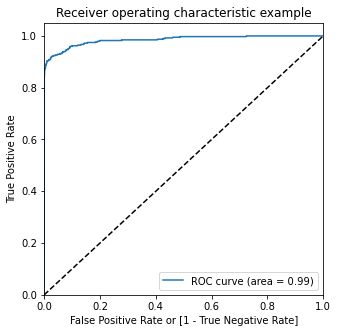

In [100]:
train_pred()

# Predicted probability
y_train_pred_proba = logistic_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [101]:
# Prediction on the test set
y_test_pred = logistic_imb_model.predict(X_test)

In [102]:
def test_pred():
    # Confusion matrix
    confusion = metrics.confusion_matrix(y_test, y_test_pred)
    print(confusion)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    # Accuracy
    print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

    # Sensitivity
    print("Sensitivity:-",TP / float(TP+FN))

    # Specificity
    print("Specificity:-", TN / float(TN+FP))

    # F1 score
    print("F1-Score:-", f1_score(y_test, y_test_pred))

    # classification_report
    print(classification_report(y_test, y_test_pred))
    # roc_auc
    auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
    print("roc_auc test score=", auc)
    return None


[[56850    16]
 [   42    54]]
Accuracy:- 0.9989817773252344
Sensitivity:- 0.5625
Specificity:- 0.9997186367952731
F1-Score:- 0.6506024096385543
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.77      0.56      0.65        96

    accuracy                           1.00     56962
   macro avg       0.89      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962

roc_auc test score= 0.9668121475632775


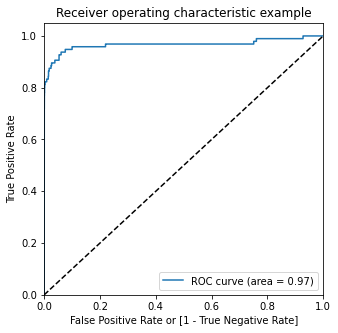

In [103]:
test_pred()

# Predicted probability
y_test_pred_proba = logistic_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### Logistic Regression Model Summary

- Train data                       
  - Accuracy    =  0.99                 
  - Sensitivity =  0.66
  - Specifivty  =  0.99
  - F1-Score    =  0.77
  - ROC         =  0.99

- Test data                       
  - Accuracy    =  0.99                   
  - Sensitivity =  0.56
  - Specifivty  =  0.99
  - F1-Score    =  0.65
  - ROC         =  0.97

We could see Train set learning is almost similar like Test set however there still can be improved  

### Decision Tree

In [106]:
# Importing decision tree classifier module
from sklearn.tree import DecisionTreeClassifier

In [107]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [108]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,3.883977,0.157109,0.041044,0.007049,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.933337,0.933180,0.923868,0.930129,0.004427,5
1,3.988463,0.203229,0.027265,0.008376,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 100}",0.933337,0.933180,0.923880,0.930133,0.004422,4
2,4.194545,0.394795,0.032071,0.000678,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 50}",0.933279,0.936720,0.944598,0.938199,0.004738,2
3,3.809521,0.111836,0.026052,0.007374,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 100}",0.933282,0.936720,0.944598,0.938200,0.004737,1
4,7.311940,0.021791,0.036462,0.007344,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.917483,0.923898,0.938041,0.926474,0.008588,6
5,7.384501,0.117074,0.029449,0.002558,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 100}",0.917500,0.923867,0.930483,0.923950,0.005301,8
6,7.270843,0.031634,0.036466,0.007355,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 50}",0.933448,0.919693,0.921755,0.924965,0.006057,7
7,7.467664,0.288813,0.036729,0.007765,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 100}",0.933431,0.919684,0.944095,0.932403,0.009992,3


In [109]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9382001202914115
DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100)


In [110]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100,
                       random_state=100)

In [111]:
# Predictions on the train set
y_train_pred = dt_imb_model.predict(X_train)

[[227374     75]
 [   114    282]]
Accuracy:- 0.9991704887094297
Sensitivity:- 0.7121212121212122
Specificity:- 0.9996702557496405
F1-Score:- 0.7490039840637449
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.79      0.71      0.75       396

    accuracy                           1.00    227845
   macro avg       0.89      0.86      0.87    227845
weighted avg       1.00      1.00      1.00    227845

roc_auc train score= 0.9534547393930157


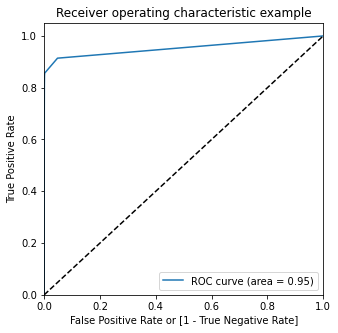

In [117]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

train_pred()

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [113]:
# Predictions on the test set
y_test_pred = dt_imb_model.predict(X_test)

[[56836    30]
 [   40    56]]
Accuracy:- 0.9987711105649381
Sensitivity:- 0.5833333333333334
Specificity:- 0.9994724439911371
F1-Score:- 0.6153846153846155
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.65      0.58      0.62        96

    accuracy                           1.00     56962
   macro avg       0.83      0.79      0.81     56962
weighted avg       1.00      1.00      1.00     56962

roc_auc test score= 0.92174979703748


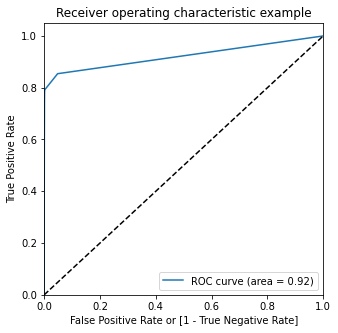

In [116]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

test_pred()

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### Decision Tree Model Summary

- Train data                       
  - Accuracy    =  0.99                 
  - Sensitivity =  0.71
  - Specifivty  =  0.99
  - F1-Score    =  0.75
  - ROC         =  0.95

- Test data                       
  - Accuracy    =  0.99                   
  - Sensitivity =  0.58
  - Specifivty  =  0.99
  - F1-Score    =  0.61
  - ROC         =  0.92



#### Random forest

In [118]:
# Importing random forest classifier module
from sklearn.ensemble import RandomForestClassifier

In [119]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [120]:
# printing the optimal accuracy score and hyperparameters
print('Accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

Accuracy of 0.9993109349306517 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 200}


In [121]:
# model with the best hyperparameters

rfc_imb_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=10,
                             n_estimators=200)

In [122]:
# Fit the model
rfc_imb_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=200)

In [123]:
# Predictions on the train set
y_train_pred = rfc_imb_model.predict(X_train)

[[227404     45]
 [   100    296]]
Accuracy:- 0.9993636024490333
Sensitivity:- 0.7474747474747475
Specificity:- 0.9998021534497843
F1-Score:- 0.8032564450474898
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.87      0.75      0.80       396

    accuracy                           1.00    227845
   macro avg       0.93      0.87      0.90    227845
weighted avg       1.00      1.00      1.00    227845

roc_auc train score= 0.9805069687950025


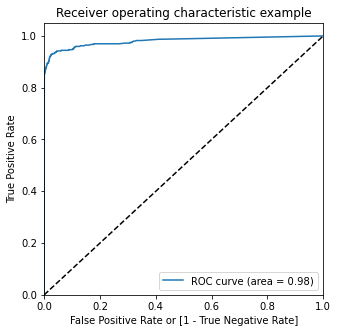

In [124]:
# Predicted probability
y_train_pred_proba = rfc_imb_model.predict_proba(X_train)[:,1]
train_pred()

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [125]:
# Predictions on the test set
y_test_pred = rfc_imb_model.predict(X_test)

[[56842    24]
 [   35    61]]
Accuracy:- 0.9989642217618764
Sensitivity:- 0.6354166666666666
Specificity:- 0.9995779551929096
F1-Score:- 0.6740331491712708
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.72      0.64      0.67        96

    accuracy                           1.00     56962
   macro avg       0.86      0.82      0.84     56962
weighted avg       1.00      1.00      1.00     56962

roc_auc test score= 0.9559576826809224


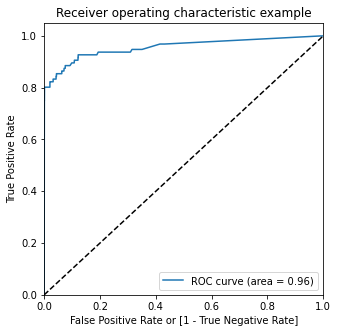

In [126]:
# Predicted probability
y_test_pred_proba = rfc_imb_model.predict_proba(X_test)[:,1]

test_pred()

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### Random Forest Model Summary

- Train data                       
  - Accuracy    =  1.00                 
  - Sensitivity =  0.74
  - Specifivty  =  1.00
  - F1-Score    =  0.80
  - ROC         =  0.98

- Test data                       
  - Accuracy    =  1.00                   
  - Sensitivity =  0.64
  - Specifivty  =  1.00
  - F1-Score    =  0.67
  - ROC         =  0.96

#### XGBoost

In [129]:
!pip install xgboost

In [130]:
# Importing XGBoost
from xgboost import XGBClassifier

In [131]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)  

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[06:37:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:38:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:38:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:38:52]

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=No

In [132]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,24.051452,1.125071,0.147678,0.029980,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.979854,0.971801,0.981423,0.977693,0.004215,1,0.999894,0.999940,0.999847,0.999894,0.000038
1,33.122874,0.283385,0.130175,0.007365,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.977143,0.972788,0.977688,0.975873,0.002193,3,0.999966,0.999987,0.999966,0.999973,0.000010
2,39.703171,0.532119,0.130175,0.007363,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.978125,0.970882,0.980136,0.976381,0.003974,2,0.999950,0.999983,0.999911,0.999948,0.000029
3,22.272587,0.220379,0.127061,0.002955,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.961154,0.974479,0.973310,0.969648,0.006025,6,0.999999,1.000000,0.999995,0.999998,0.000002
4,30.722517,0.158287,0.119765,0.007365,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.970611,0.965528,0.983906,0.973348,0.007748,5,1.000000,1.000000,1.000000,1.000000,0.000000
5,38.300669,0.483030,0.127450,0.003502,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.972799,0.973557,0.974113,0.973490,0.000539,4,1.000000,1.000000,1.000000,1.000000,0.000000


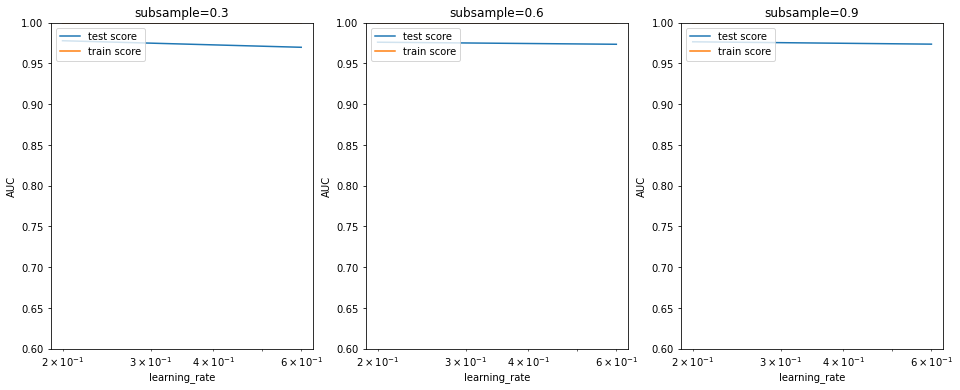

In [133]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [134]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.3}

In [135]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

[06:48:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:48:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [136]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)

[[227449      0]
 [     0    396]]
Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00       396

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845

roc_auc train score= 0.9805069687950025


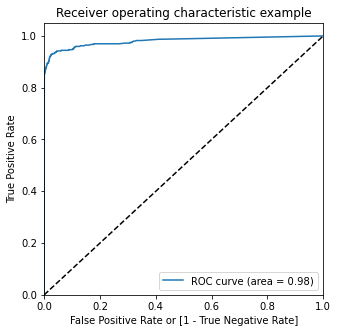

In [137]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]
train_pred()

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [138]:
# Predictions on the test set
y_test_pred = rfc_imb_model.predict(X_test)

[[56842    24]
 [   35    61]]
Accuracy:- 0.9989642217618764
Sensitivity:- 0.6354166666666666
Specificity:- 0.9995779551929096
F1-Score:- 0.6740331491712708
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.72      0.64      0.67        96

    accuracy                           1.00     56962
   macro avg       0.86      0.82      0.84     56962
weighted avg       1.00      1.00      1.00     56962

roc_auc test score= 0.9785370798602564


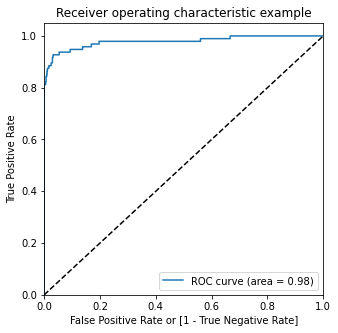

In [139]:
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

test_pred()

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### XGBoost Model Summary

- Train data                       
  - Accuracy    =  1.00                 
  - Sensitivity =  1.00
  - Specifivty  =  1.00
  - F1-Score    =  1.00
  - ROC         =  0.98

- Test data                       
  - Accuracy    =  0.99                   
  - Sensitivity =  0.64
  - Specifivty  =  1.00
  - F1-Score    =  0.67
  - ROC         =  0.98

# <font color = red> Milestone step 5  <font> - `Choosing best model on the imbalanced data`   

We tried various models with imbalance dataset ( Logistic Regression, Decision Tree, Random Forest and XGBoost) , what I saw almost all these performed exceptionally well however Loistic Regression ROC-AUC curve 99% Train and 97% Test shown good performance but considering all factors and less difference between Train and Test data set `XGBoost shown 98%` which among the best model I would recommend. 

If you look into comparision with Logistic Regression, test performance of `XGBoost is 1% better than Liner Regression` henceforth we will choose more close option.

### Print the important features of the best model to understand the dataset

Top var = 17
2nd Top var = 14
3rd Top var = 10


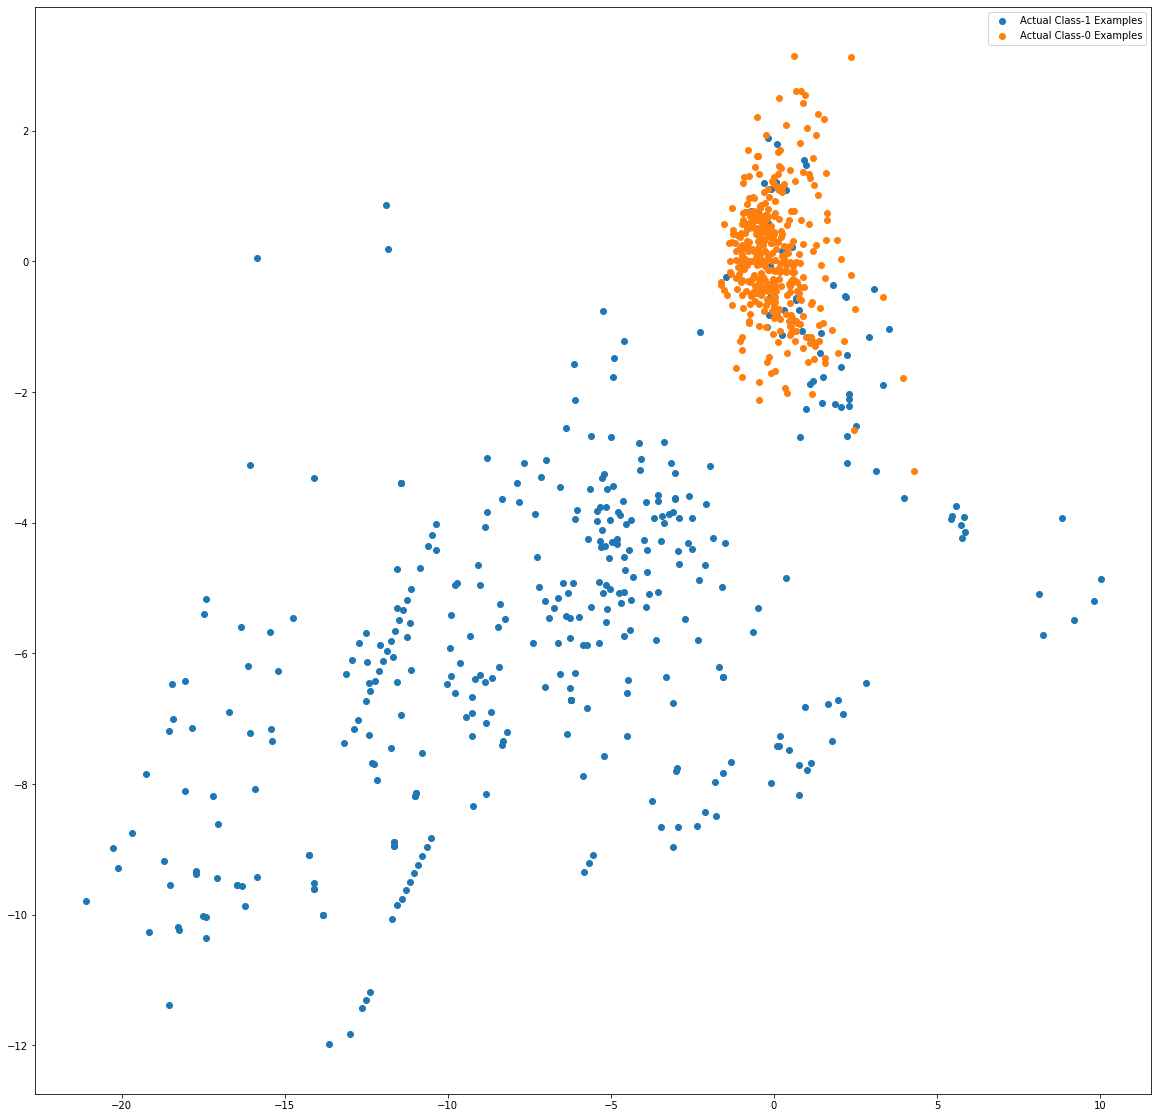

In [140]:
# Features of XGBoost model

var_imp = []
for i in xgb_imb_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-3])+1)
# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#### Print the FPR,TPR & select the best threshold from the roc curve

In [141]:

print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_proba_imb_xgb)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 1.0
Threshold= 0.8474788


#### <font color = red> Milestone step 6  <font> - `Handling data imbalance and process each model of Milestone step 7 on each imbalance technique one by one`
- Undersampling
- Oversampling
- SMOTE (Synthetic Minority Oversampling Technique)
- AdaSyn (Adaptive Synthetic Sampling)

## Undersampling
- Logistic regression
- Decision Tree
- Random forest
- XGBoost

In [142]:
# Importing undersampler library
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [145]:
rus = RandomUnderSampler()
# resampling X, y
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
print('Before sampling class distribution:-',Counter(y_train))
print('New class distribution:-',Counter(y_train_rus))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 396, 1: 396})


##### Logistic regression

In [146]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Lets take tradtional params to identify C value
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_rus, y_train_rus)
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 5 folds for each of 6 candidates, totalling 30 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.014772,0.008494,0.004182,0.002222,0.01,{'C': 0.01},0.986963,0.996676,0.972917,0.979477,0.984529,0.984112,0.007912,1,0.989056,0.986812,0.990934,0.989511,0.988671,0.988997,0.001334
1,0.003065,0.006130,0.001197,0.002394,0.1,{'C': 0.1},0.986486,0.997151,0.970994,0.975309,0.986301,0.983248,0.009234,2,0.990973,0.989178,0.993571,0.992317,0.991041,0.991416,0.001470
2,0.013830,0.007185,0.003008,0.004282,1,{'C': 1},0.983466,0.995252,0.968590,0.968575,0.988719,0.980920,0.010744,3,0.991921,0.990696,0.994994,0.993203,0.992146,0.992592,0.001441
3,0.015621,0.000006,0.000000,0.000000,10,{'C': 10},0.977901,0.994619,0.966186,0.965208,0.989041,0.978591,0.011828,4,0.992640,0.990716,0.995154,0.993551,0.991747,0.992762,0.001521
4,0.021872,0.007656,0.000000,0.000000,100,{'C': 100},0.976630,0.994460,0.965224,0.965849,0.989525,0.978338,0.011966,6,0.992780,0.990616,0.995054,0.994029,0.991528,0.992802,0.001611
5,0.024994,0.007692,0.000000,0.000000,1000,{'C': 1000},0.976630,0.994460,0.964744,0.966330,0.989525,0.978338,0.011975,5,0.992770,0.990566,0.995044,0.994168,0.991459,0.992801,0.001655


 The highest test roc_auc is 0.9841124365610667 at C = 0.01


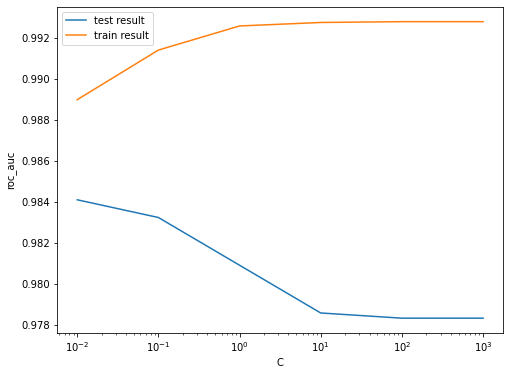

In [147]:
# train and validation scores for C values

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

# Identify best score and optimum C value
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

In [148]:
# Logistic regression with optimal C=0.01
logistic_bal_rus = LogisticRegression(C=0.01)
# Fit the model on the train set
logistic_bal_rus_model = logistic_bal_rus.fit(X_train_rus, y_train_rus)
# Predictions on the train set
y_train_pred = logistic_bal_rus_model.predict(X_train_rus)

In [151]:
def train_pred_rus():
    # Confusion matrix
    confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
    print(confusion)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    # Accuracy
    print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

    # Sensitivity
    print("Sensitivity:-",TP / float(TP+FN))

    # Specificity
    print("Specificity:-", TN / float(TN+FP))

    # F1 score
    print("F1-Score:-", f1_score(y_train_rus, y_train_pred))

    # classification_report
    print(classification_report(y_train_rus, y_train_pred))
    # roc_auc
    auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
    print("roc_auc train score=", auc)
    return None

In [150]:
def test_pred_rus():
    # Confusion matrix
    confusion = metrics.confusion_matrix(y_test, y_test_pred)
    print(confusion)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    # Accuracy
    print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

    # Sensitivity
    print("Sensitivity:-",TP / float(TP+FN))

    # Specificity
    print("Specificity:-", TN / float(TN+FP))

    # F1 score
    print("F1-Score:-", f1_score(y_test, y_test_pred))

    # classification_report
    print(classification_report(y_test, y_test_pred))
    # roc_auc
    auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
    print("roc_auc test score=", auc)
    return None

[[393   3]
 [ 43 353]]
Accuracy:- 0.9419191919191919
Sensitivity:- 0.8914141414141414
Specificity:- 0.9924242424242424
F1-Score:- 0.9388297872340426
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       396
           1       0.99      0.89      0.94       396

    accuracy                           0.94       792
   macro avg       0.95      0.94      0.94       792
weighted avg       0.95      0.94      0.94       792

roc_auc train score= 0.9889041934496481


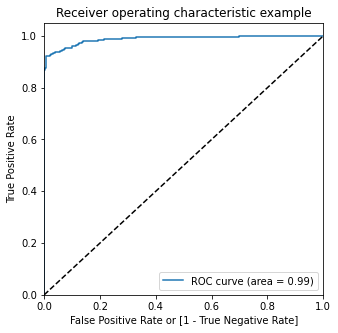

In [156]:
# Predicted probability
y_train_pred_proba = logistic_bal_rus_model.predict_proba(X_train_rus)[:,1]

train_pred_rus()

# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

In [157]:
## Prediction on the test set
y_test_pred = logistic_bal_rus_model.predict(X_test)

[[56276   590]
 [   16    80]]
Accuracy:- 0.9893613286050349
Sensitivity:- 0.8333333333333334
Specificity:- 0.9896247318256955
F1-Score:- 0.20887728459530025
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56866
           1       0.12      0.83      0.21        96

    accuracy                           0.99     56962
   macro avg       0.56      0.91      0.60     56962
weighted avg       1.00      0.99      0.99     56962

roc_auc test score= 0.9624936986365609


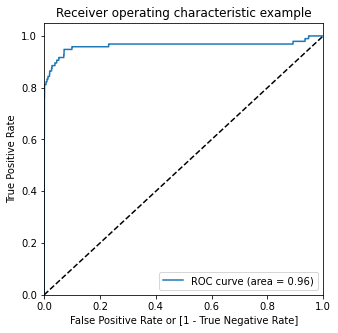

In [158]:

# Predicted probability
y_test_pred_proba = logistic_bal_rus_model.predict_proba(X_test)[:,1]

test_pred_rus()

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### UnderSampling - Logistic Regression Model Summary

- Train data                       
  - Accuracy    =  0.94                 
  - Sensitivity =  0.89
  - Specifivty  =  0.99
  - F1-Score    =  0.94
  - ROC         =  0.99

- Test data                       
  - Accuracy    =  0.98                   
  - Sensitivity =  0.83
  - Specifivty  =  0.99
  - F1-Score    =  0.20
  - ROC         =  0.96

##### Decision Tree

In [159]:
# Choose param grid as default value
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_rus,y_train_rus)

# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best roc_auc:- 0.9611072849709213
DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50)


In [160]:
# Model with optimal hyperparameters
dt_bal_rus_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_bal_rus_model.fit(X_train_rus, y_train_rus)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [161]:
# Predictions on the train set
y_train_pred = dt_bal_rus_model.predict(X_train_rus)

[[389   7]
 [ 47 349]]
Accuracy:- 0.9318181818181818
Sensitivity:- 0.8813131313131313
Specificity:- 0.9823232323232324
F1-Score:- 0.928191489361702
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       396
           1       0.98      0.88      0.93       396

    accuracy                           0.93       792
   macro avg       0.94      0.93      0.93       792
weighted avg       0.94      0.93      0.93       792

roc_auc train score= 0.9808278491990613


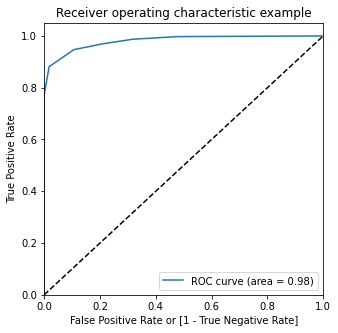

In [162]:
# Predicted probability
y_train_pred_proba = dt_bal_rus_model.predict_proba(X_train_rus)[:,1]

train_pred_rus()

# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

In [163]:
# Predictions on the test set
y_test_pred = dt_bal_rus_model.predict(X_test)

[[55139  1727]
 [   16    80]]
Accuracy:- 0.9694006530669569
Sensitivity:- 0.8333333333333334
Specificity:- 0.96963035908979
F1-Score:- 0.08407777193904362
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56866
           1       0.04      0.83      0.08        96

    accuracy                           0.97     56962
   macro avg       0.52      0.90      0.53     56962
weighted avg       1.00      0.97      0.98     56962

roc_auc test score= 0.9603365807336546


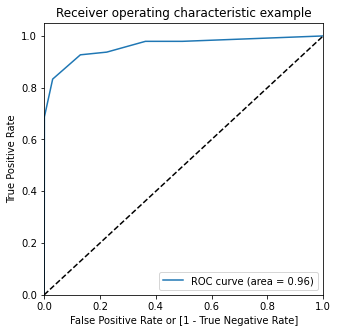

In [164]:
# Predicted probability
y_test_pred_proba = dt_bal_rus_model.predict_proba(X_test)[:,1]

test_pred_rus()

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### UnderSampling - Decision Tree Model Summary

- Train data                       
  - Accuracy    =  0.93                 
  - Sensitivity =  0.88
  - Specifivty  =  0.98
  - F1-Score    =  0.92
  - ROC         =  0.98

- Test data                       
  - Accuracy    =  0.97                   
  - Sensitivity =  0.83
  - Specifivty  =  0.97
  - F1-Score    =  0.84
  - ROC         =  0.96

##### Random forest

In [166]:
# Choose param grid as default value
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_rus, y_train_rus)
# printing the optimal accuracy score and hyperparameters
print('We can get roc-auc of',grid_search.best_score_,'using',grid_search.best_params_)

Fitting 2 folds for each of 24 candidates, totalling 48 fits
We can get roc-auc of 0.9783695541271298 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 200}


In [167]:
# model with the best hyperparameters

rfc_bal_rus_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=200)
# Fit the model
rfc_bal_rus_model.fit(X_train_rus, y_train_rus)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50, n_estimators=200)

In [168]:
# Predictions on the train set
y_train_pred = rfc_bal_rus_model.predict(X_train_rus)

[[392   4]
 [ 41 355]]
Accuracy:- 0.9431818181818182
Sensitivity:- 0.8964646464646465
Specificity:- 0.98989898989899
F1-Score:- 0.9403973509933775
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       396
           1       0.99      0.90      0.94       396

    accuracy                           0.94       792
   macro avg       0.95      0.94      0.94       792
weighted avg       0.95      0.94      0.94       792

roc_auc train score= 0.986563871033568


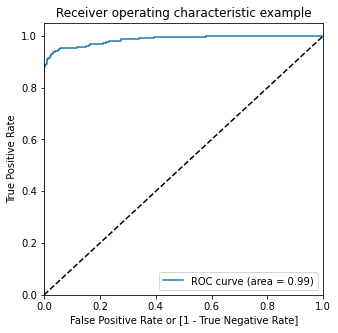

In [169]:
# Predicted probability
y_train_pred_proba = rfc_bal_rus_model.predict_proba(X_train_rus)[:,1]

train_pred_rus()

# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

In [170]:
# Predictions on the test set
y_test_pred = rfc_bal_rus_model.predict(X_test)

[[55779  1087]
 [   16    80]]
Accuracy:- 0.980636213616095
Sensitivity:- 0.8333333333333334
Specificity:- 0.9808848872788661
F1-Score:- 0.1266825019794141
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.07      0.83      0.13        96

    accuracy                           0.98     56962
   macro avg       0.53      0.91      0.56     56962
weighted avg       1.00      0.98      0.99     56962

roc_auc test score= 0.9729800649773152


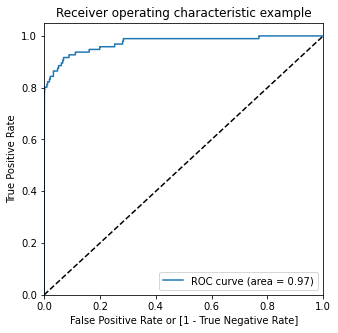

In [171]:
# Predicted probability
y_test_pred_proba = rfc_bal_rus_model.predict_proba(X_test)[:,1]

test_pred_rus()

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### UnderSampling - Random Forest Model Summary

- Train data                       
  - Accuracy    =  0.94                 
  - Sensitivity =  0.90
  - Specifivty  =  0.99
  - F1-Score    =  0.94
  - ROC         =  0.99

- Test data                       
  - Accuracy    =  0.98                   
  - Sensitivity =  0.83
  - Specifivty  =  0.98
  - F1-Score    =  0.12
  - ROC         =  0.97

##### XGBoost

In [173]:

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_rus, y_train_rus)   
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[00:56:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:56:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:56:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:56:12]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.371561,0.114301,0.014184,0.001097,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.968664,0.972165,0.981061,0.973963,0.005218,2,1.0,1.0,1.0,1.0,0.0
1,0.357024,0.067560,0.013407,0.003132,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.966885,0.972452,0.980085,0.973140,0.005411,3,1.0,1.0,1.0,1.0,0.0
2,0.330602,0.009328,0.014737,0.001254,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.972337,0.974174,0.978134,0.974881,0.002419,1,1.0,1.0,1.0,1.0,0.0
3,0.278709,0.006544,0.012952,0.001638,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.961547,0.961547,0.977502,0.966866,0.007521,6,1.0,1.0,1.0,1.0,0.0
4,0.317630,0.036026,0.011811,0.003634,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.968033,0.966368,0.984045,0.972815,0.007970,4,1.0,1.0,1.0,1.0,0.0
5,0.312154,0.010432,0.013791,0.002595,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.971419,0.971189,0.972394,0.971667,0.000523,5,1.0,1.0,1.0,1.0,0.0


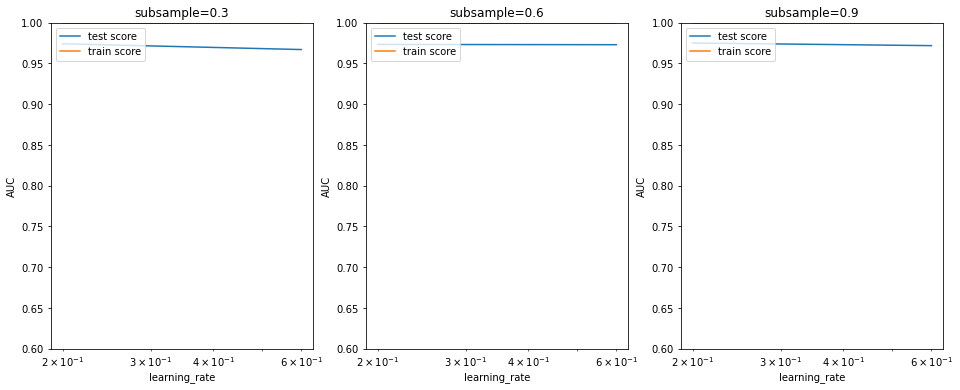

In [174]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [175]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.9}

In [176]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_rus_model = XGBClassifier(params = params)
xgb_bal_rus_model.fit(X_train_rus, y_train_rus)

[00:57:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:57:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [177]:
# Predictions on the train set
y_train_pred = xgb_bal_rus_model.predict(X_train_rus)

[[396   0]
 [  0 396]]
Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       396
           1       1.00      1.00      1.00       396

    accuracy                           1.00       792
   macro avg       1.00      1.00      1.00       792
weighted avg       1.00      1.00      1.00       792

roc_auc train score= 1.0


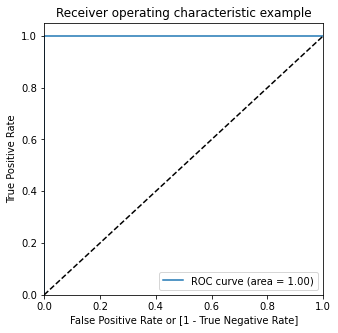

In [178]:
# Predicted probability
y_train_pred_proba = xgb_bal_rus_model.predict_proba(X_train_rus)[:,1]

train_pred_rus()

# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

In [179]:
# Predictions on the test set
y_test_pred = xgb_bal_rus_model.predict(X_test)

[[54596  2270]
 [   10    86]]
Accuracy:- 0.9599733155436958
Sensitivity:- 0.8958333333333334
Specificity:- 0.9600815953293708
F1-Score:- 0.0701468189233279
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56866
           1       0.04      0.90      0.07        96

    accuracy                           0.96     56962
   macro avg       0.52      0.93      0.52     56962
weighted avg       1.00      0.96      0.98     56962

roc_auc test score= 0.9838107165676033


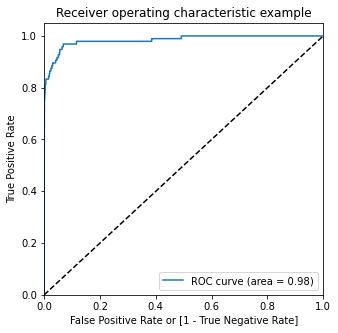

In [180]:
# Predicted probability
y_test_pred_proba = xgb_bal_rus_model.predict_proba(X_test)[:,1]

test_pred_rus()

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### UnderSampling - XGBoost Model Summary

- Train data                       
  - Accuracy    =  1.00                 
  - Sensitivity =  1.00
  - Specifivty  =  1.00
  - F1-Score    =  1.00
  - ROC         =  1.00

- Test data                       
  - Accuracy    =  0.99                   
  - Sensitivity =  0.90
  - Specifivty  =  0.90
  - F1-Score    =  0.70
  - ROC         =  0.98

## Oversampling
- Logistic regression
- Decision Tree
- Random forest
- XGBoost

In [183]:
# Importing oversampler library
from imblearn.over_sampling import RandomOverSampler

In [184]:
ros = RandomOverSampler()
# resampling X, y
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
print('Before sampling class distribution:-',Counter(y_train))
print('New class distribution:-',Counter(y_train_ros))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 227449, 1: 227449})


##### Logistic regression

In [185]:
# Lets create K-Fold method with number of split =5
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Declare C value parameter as 0.01,0.1,1,10,100,1000, and identify C value

params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_ros, y_train_ros)

# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 5 folds for each of 6 candidates, totalling 30 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.473119,3.514842,0.416533,0.482677,0.01,{'C': 0.01},0.988853,0.988588,0.988652,0.988112,0.988544,0.988550,0.000243,6,0.988541,0.988507,0.988528,0.988682,0.988556,0.988563,0.000062
1,3.402612,1.157247,0.183081,0.183562,0.1,{'C': 0.1},0.988862,0.988606,0.988667,0.988095,0.988559,0.988558,0.000253,2,0.988556,0.988518,0.988533,0.988690,0.988565,0.988572,0.000061
2,4.816467,3.389778,1.178851,1.747347,1,{'C': 1},0.988863,0.988609,0.988665,0.988093,0.988560,0.988558,0.000254,1,0.988557,0.988519,0.988532,0.988690,0.988564,0.988572,0.000061
3,2.381132,0.193968,0.060474,0.016894,10,{'C': 10},0.988862,0.988609,0.988664,0.988092,0.988560,0.988558,0.000255,3,0.988557,0.988519,0.988531,0.988690,0.988564,0.988572,0.000061
4,3.235070,0.634316,0.069016,0.020146,100,{'C': 100},0.988862,0.988609,0.988664,0.988092,0.988560,0.988557,0.000255,5,0.988557,0.988519,0.988531,0.988691,0.988564,0.988572,0.000061
5,2.416887,0.256843,0.046189,0.013595,1000,{'C': 1000},0.988862,0.988609,0.988664,0.988092,0.988560,0.988557,0.000254,4,0.988557,0.988519,0.988531,0.988691,0.988564,0.988572,0.000061


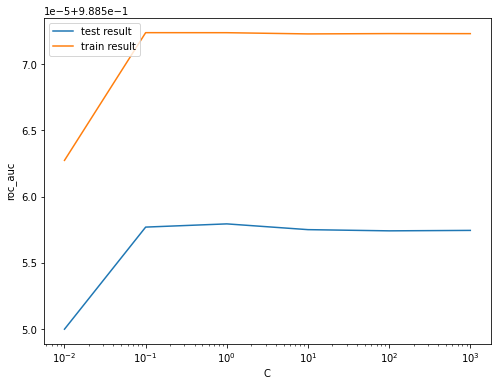

In [186]:
# Lets plot train and validation scores against C values

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [187]:
# Now lets see best c score
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9885579562831699 at C = 1


In [188]:
# Let's see the model with best C value , c=1
logistic_bal_ros = LogisticRegression(C=1)
# Fit the model on the train set
logistic_bal_ros_model = logistic_bal_ros.fit(X_train_ros, y_train_ros)
# Predictions on the train set
y_train_pred = logistic_bal_ros_model.predict(X_train_ros)

In [192]:
def train_pred_ros():
    # Confusion matrix
    confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
    print(confusion)
    
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    # Accuracy
    print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

    # Sensitivity
    print("Sensitivity:-",TP / float(TP+FN))

    # Specificity
    print("Specificity:-", TN / float(TN+FP))

    # F1 score
    print("F1-Score:-", f1_score(y_train_ros, y_train_pred))

    # classification_report
    print(classification_report(y_train_ros, y_train_pred))

    # classification_report
    print(classification_report(y_train_ros, y_train_pred))
    # roc_auc
    auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
    print("roc_auc train score=", auc)
    return None

In [190]:
def test_pred_ros():
    # Confusion matrix
    confusion = metrics.confusion_matrix(y_test, y_test_pred)
    print(confusion)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    # Accuracy
    print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

    # Sensitivity
    print("Sensitivity:-",TP / float(TP+FN))

    # Specificity
    print("Specificity:-", TN / float(TN+FP))

    # F1 score
    print("F1-Score:-", f1_score(y_test, y_test_pred))

    # classification_report
    print(classification_report(y_test, y_test_pred))
    # roc_auc
    auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
    print("roc_auc test score=", auc)
    return None

[[222268   5181]
 [ 17235 210214]]
Accuracy:- 0.9507230192262881
Sensitivity:- 0.924224771267405
Specificity:- 0.9772212671851712
F1-Score:- 0.9493817235866355
              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.98      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898

              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.98      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898

roc_auc train score= 0.9885669818050974


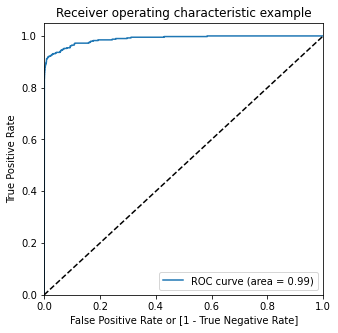

In [193]:
# Predicted probability
y_train_pred_proba = logistic_bal_ros_model.predict_proba(X_train_ros)[:,1]

train_pred_ros()

# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

In [194]:
# Prediction on the test set
y_test_pred = logistic_bal_ros_model.predict(X_test)

[[55535  1331]
 [   11    85]]
Accuracy:- 0.9764404339735262
Sensitivity:- 0.8854166666666666
Specificity:- 0.9765940984067809
F1-Score:- 0.11243386243386244
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.89      0.11        96

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962

roc_auc test score= 0.9713319103975427


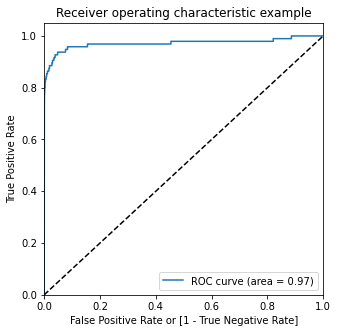

In [195]:
# Predicted probability
y_test_pred_proba = logistic_bal_ros_model.predict_proba(X_test)[:,1]

test_pred_ros()

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### OverSampling - Logistic regression Model Summary

- Train data                       
  - Accuracy    =  0.95                 
  - Sensitivity =  0.92
  - Specifivty  =  0.98
  - F1-Score    =  0.95
  - ROC         =  0.99

- Test data                       
  - Accuracy    =  0.98                   
  - Sensitivity =  0.85
  - Specifivty  =  0.98
  - F1-Score    =  0.11
  - ROC         =  0.97

##### Decision Tree

In [196]:
# Lets create Param_grid with default values and find best grd search estimator 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_ros,y_train_ros)

# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

Fitting 3 folds for each of 8 candidates, totalling 24 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,5.004432,0.171666,0.067699,0.007339,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.990196,0.990973,0.990367,0.990512,0.000333,5
1,4.905974,0.090144,0.075618,0.009871,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 100}",0.990196,0.990973,0.990367,0.990512,0.000333,5
2,5.641863,0.414339,0.094783,0.025556,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 50}",0.990164,0.990898,0.990157,0.990407,0.000348,7
3,5.718036,0.162522,0.087597,0.030620,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 100}",0.990171,0.990888,0.990157,0.990405,0.000341,8
4,9.014148,0.426560,0.067721,0.007366,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.999548,0.999661,0.999630,0.999613,0.000048,2
5,9.140967,0.111677,0.068961,0.009170,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 100}",0.999608,0.999663,0.999642,0.999638,0.000023,1
6,9.704920,1.173170,0.197019,0.058285,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 50}",0.999541,0.999643,0.999433,0.999539,0.000086,3
7,7.343956,0.070649,0.083378,0.028500,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 100}",0.999512,0.999631,0.999458,0.999534,0.000072,4


In [197]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9996378636513154
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [198]:
# Model with optimal hyperparameters
dt_bal_ros_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_bal_ros_model.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

In [199]:
# Predictions on the train set
y_train_pred = dt_bal_ros_model.predict(X_train_ros)

[[226047   1402]
 [     0 227449]]
Accuracy:- 0.9969179904066406
Sensitivity:- 1.0
Specificity:- 0.9938359808132812
F1-Score:- 0.9969274600043831
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    227449
           1       0.99      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    227449
           1       0.99      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898

roc_auc train score= 0.999734753911932


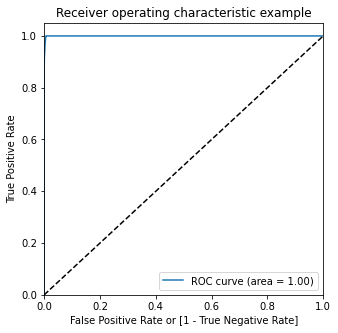

In [200]:
# Predicted probability
y_train_pred_proba = dt_bal_ros_model.predict_proba(X_train_ros)[:,1]

train_pred_ros()

# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

In [201]:
# Predictions on the test set
y_test_pred = dt_bal_ros_model.predict(X_test)

[[56464   402]
 [   21    75]]
Accuracy:- 0.992573996699554
Sensitivity:- 0.78125
Specificity:- 0.9929307494812366
F1-Score:- 0.2617801047120419
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56866
           1       0.16      0.78      0.26        96

    accuracy                           0.99     56962
   macro avg       0.58      0.89      0.63     56962
weighted avg       1.00      0.99      1.00     56962

roc_auc test score= 0.8895940676326805


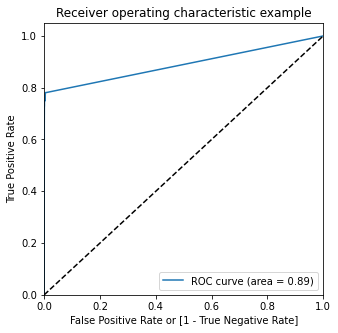

In [202]:
# Predicted probability
y_test_pred_proba = dt_bal_ros_model.predict_proba(X_test)[:,1]

test_pred_ros()

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### OverSampling - Decision Tree Model Summary

- Train data                       
  - Accuracy    =  1.00                 
  - Sensitivity =  1.00
  - Specifivty  =  0.99
  - F1-Score    =  1.00
  - ROC         =  1.00

- Test data                       
  - Accuracy    =  0.99                   
  - Sensitivity =  0.78
  - Specifivty  =  0.99
  - F1-Score    =  0.26
  - ROC         =  0.89

#####  Random forest

In [203]:
# Choose param grid as default value
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_ros, y_train_ros)
# printing the optimal accuracy score and hyperparameters
print('We can get roc-auc of',grid_search.best_score_,'using',grid_search.best_params_)

Fitting 2 folds for each of 24 candidates, totalling 48 fits
We can get roc-auc of 0.9948054811099125 using {'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 200}


In [204]:
# model with the best hyperparameters

rfc_bal_ros_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=200)
# Fit the model
rfc_bal_ros_model.fit(X_train_ros, y_train_ros)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=200)

In [205]:
# Predictions on the train set
y_train_pred = rfc_bal_ros_model.predict(X_train_ros)

[[226218   1231]
 [ 10334 217115]]
Accuracy:- 0.9745767182972886
Sensitivity:- 0.9545656388904765
Specificity:- 0.9945877977041007
F1-Score:- 0.9740575825211139
              precision    recall  f1-score   support

           0       0.96      0.99      0.98    227449
           1       0.99      0.95      0.97    227449

    accuracy                           0.97    454898
   macro avg       0.98      0.97      0.97    454898
weighted avg       0.98      0.97      0.97    454898

              precision    recall  f1-score   support

           0       0.96      0.99      0.98    227449
           1       0.99      0.95      0.97    227449

    accuracy                           0.97    454898
   macro avg       0.98      0.97      0.97    454898
weighted avg       0.98      0.97      0.97    454898

roc_auc train score= 0.9946239708001541


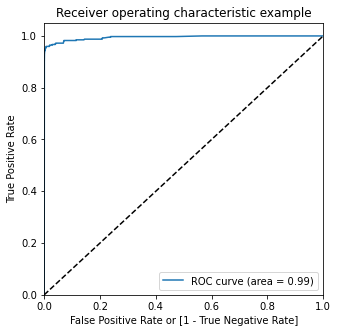

In [206]:
# Predicted probability
y_train_pred_proba = rfc_bal_ros_model.predict_proba(X_train_ros)[:,1]

train_pred_ros()

# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

In [207]:
# Predictions on the test set
y_test_pred = rfc_bal_ros_model.predict(X_test)

[[56521   345]
 [   18    78]]
Accuracy:- 0.9936273305010358
Sensitivity:- 0.8125
Specificity:- 0.9939331058980762
F1-Score:- 0.3005780346820809
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56866
           1       0.18      0.81      0.30        96

    accuracy                           0.99     56962
   macro avg       0.59      0.90      0.65     56962
weighted avg       1.00      0.99      1.00     56962

roc_auc test score= 0.9788100168231749


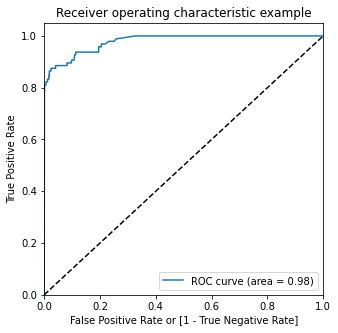

In [208]:
# Predicted probability
y_test_pred_proba = rfc_bal_ros_model.predict_proba(X_test)[:,1]

test_pred_ros()

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### OverSampling - Random Forest Model Summary

- Train data                       
  - Accuracy    =  0.97                 
  - Sensitivity =  0.95
  - Specifivty  =  0.99
  - F1-Score    =  0.97
  - ROC         =  0.99

- Test data                       
  - Accuracy    =  0.99                   
  - Sensitivity =  0.81
  - Specifivty  =  0.99
  - F1-Score    =  0.30
  - ROC         =  0.98

#####  XGBoost

In [209]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_ros, y_train_ros) 
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[17:17:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:18:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:21]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,71.630544,2.829062,0.400644,0.115799,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999912,0.999918,0.999922,0.999917,0.000004,4,0.999933,0.999934,0.999934,0.999934,5.777767e-07
1,86.958992,1.698945,0.297876,0.009162,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999912,0.999921,0.999913,0.999915,0.000004,6,0.999923,0.999925,0.999921,0.999923,1.710271e-06
2,98.484983,0.382070,0.300865,0.018330,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999924,0.999914,0.999912,0.999916,0.000005,5,0.999927,0.999923,0.999933,0.999928,4.449053e-06
3,70.797703,1.381486,0.310178,0.018759,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999991,0.999982,0.999980,0.999984,0.000005,2,1.000000,0.999997,0.999998,0.999998,1.197911e-06
4,62.757450,13.378980,0.233801,0.003954,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999989,0.999990,0.999981,0.999986,0.000004,1,0.999999,1.000000,1.000000,0.999999,4.396384e-07
5,58.685676,0.648094,0.230686,0.016142,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999995,0.999988,0.999967,0.999983,0.000012,3,0.999998,0.999999,1.000000,0.999999,5.364172e-07


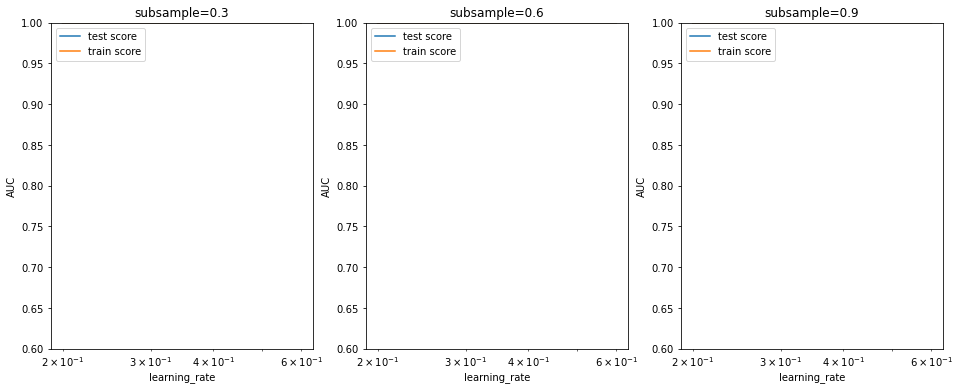

In [210]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [211]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [212]:
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_ros_model = XGBClassifier(params = params)
xgb_bal_ros_model.fit(X_train_ros, y_train_ros)

[00:37:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:37:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [213]:
# Predictions on the train set
y_train_pred = xgb_bal_ros_model.predict(X_train_ros)

[[227449      0]
 [     0 227449]]
Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898

roc_auc train score= 1.0


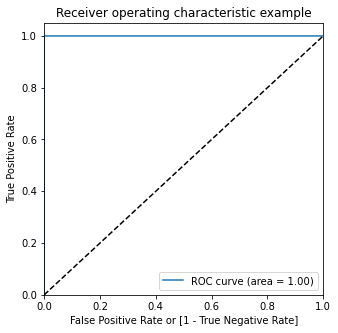

In [214]:
# Predicted probability
y_train_pred_proba = xgb_bal_ros_model.predict_proba(X_train_ros)[:,1]

train_pred_ros()

# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

In [215]:
# Predictions on the test set
y_test_pred = xgb_bal_ros_model.predict(X_test)

[[56858     8]
 [   20    76]]
Accuracy:- 0.9995084442259752
Sensitivity:- 0.7916666666666666
Specificity:- 0.9998593183976365
F1-Score:- 0.8444444444444444
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.90      0.79      0.84        96

    accuracy                           1.00     56962
   macro avg       0.95      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962

roc_auc test score= 0.9732135268291539


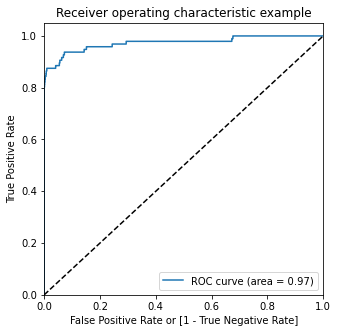

In [216]:
# Predicted probability
y_test_pred_proba = xgb_bal_ros_model.predict_proba(X_test)[:,1]

test_pred_ros()

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### OverSampling - XGBoost Model Summary

- Train data                       
  - Accuracy    =  1.00                 
  - Sensitivity =  1.00
  - Specifivty  =  1.00
  - F1-Score    =  1.00
  - ROC         =  1.00

- Test data                       
  - Accuracy    =  1.00                   
  - Sensitivity =  0.79
  - Specifivty  =  1.00
  - F1-Score    =  0.84
  - ROC         =  0.97

## SMOTE (Synthetic Minority Oversampling Technique)
- Logistic regression
- Decision Tree
- Random forest
- XGBoost

In [218]:
# Importing SMOTE module
from imblearn.over_sampling import SMOTE

In [220]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)
# Fitting SMOTE to the train set
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
print('Before SMOTE oversampling X_train shape=',X_train.shape)
print('After SMOTE oversampling X_train shape=',X_train_smote.shape)

Before SMOTE oversampling X_train shape= (227845, 29)
After SMOTE oversampling X_train shape= (454898, 29)


##### Logistic regression

In [221]:
# Lets create K-Fold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Choosing params value fr c as default 0.01,0.1,1,10,100,1000 and identifiy the best c value
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 5 folds for each of 6 candidates, totalling 30 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.238215,0.152547,0.047652,0.002815,0.01,{'C': 0.01},0.989805,0.989796,0.989484,0.989631,0.989910,0.989725,0.000150,6,0.989758,0.989666,0.989760,0.989841,0.989682,0.989741,0.000063
1,2.091873,0.091614,0.046108,0.002696,0.1,{'C': 0.1},0.989834,0.989807,0.989488,0.989632,0.989942,0.989741,0.000161,1,0.989780,0.989686,0.989772,0.989853,0.989700,0.989758,0.000060
2,2.037655,0.073955,0.043714,0.011651,1,{'C': 1},0.989836,0.989807,0.989486,0.989630,0.989944,0.989741,0.000162,2,0.989781,0.989687,0.989772,0.989852,0.989701,0.989758,0.000060
3,2.312963,0.223252,0.050990,0.004520,10,{'C': 10},0.989836,0.989807,0.989486,0.989630,0.989945,0.989741,0.000163,5,0.989781,0.989687,0.989772,0.989852,0.989701,0.989758,0.000060
4,2.284592,0.122566,0.052532,0.006735,100,{'C': 100},0.989836,0.989807,0.989486,0.989630,0.989945,0.989741,0.000163,3,0.989781,0.989687,0.989772,0.989852,0.989701,0.989758,0.000060
5,2.275762,0.178074,0.045071,0.005818,1000,{'C': 1000},0.989836,0.989807,0.989486,0.989630,0.989945,0.989741,0.000163,4,0.989781,0.989687,0.989772,0.989852,0.989701,0.989758,0.000060


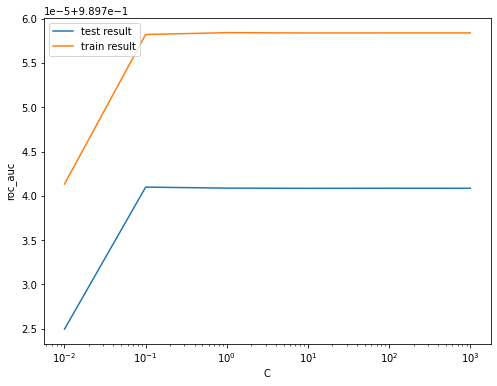

In [222]:
# plot train and validation scores for c values

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [223]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']
print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9897409900830768 at C = 0.1


In [224]:
# Instantiate the model with best C
logistic_bal_smote = LogisticRegression(C=0.1)

In [225]:
# Fit the model on the train set
logistic_bal_smote_model = logistic_bal_smote.fit(X_train_smote, y_train_smote)

In [226]:
def train_pred_smote():
    # Confusion matrix
    confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
    print(confusion)
    
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    # Accuracy
    print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

    # Sensitivity
    print("Sensitivity:-",TP / float(TP+FN))

    # Specificity
    print("Specificity:-", TN / float(TN+FP))

    # F1 score
    print("F1-Score:-", f1_score(y_train_smote, y_train_pred))

    # classification_report
    print(classification_report(y_train_smote, y_train_pred))

    # classification_report
    print(classification_report(y_train_smote, y_train_pred))
    # roc_auc
    auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
    print("roc_auc train score=", auc)
    return None

In [227]:
def test_pred_smote():
    # Confusion matrix
    confusion = metrics.confusion_matrix(y_test, y_test_pred)
    print(confusion)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    # Accuracy
    print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

    # Sensitivity
    print("Sensitivity:-",TP / float(TP+FN))

    # Specificity
    print("Specificity:-", TN / float(TN+FP))

    # F1 score
    print("F1-Score:-", f1_score(y_test, y_test_pred))

    # classification_report
    print(classification_report(y_test, y_test_pred))
    # roc_auc
    auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
    print("roc_auc test score=", auc)
    return None

In [228]:
# Predictions on the train set
y_train_pred = logistic_bal_smote_model.predict(X_train_smote)

[[221911   5538]
 [ 17693 209756]]
Accuracy:- 0.9489314087993352
Sensitivity:- 0.9222111330452102
Specificity:- 0.9756516845534603
F1-Score:- 0.9475293793464833
              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.97      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898

              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.97      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898

roc_auc train score= 1.0


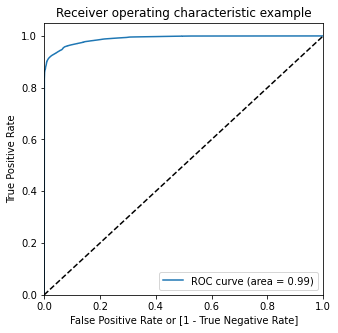

In [229]:
# Predicted probability
y_train_pred_proba_log_bal_smote = logistic_bal_smote_model.predict_proba(X_train_smote)[:,1]

train_pred_smote()

# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_log_bal_smote)

In [230]:
# Prediction on the test set
y_test_pred = logistic_bal_smote_model.predict(X_test)

[[55416  1450]
 [   10    86]]
Accuracy:- 0.9743688774972789
Sensitivity:- 0.8958333333333334
Specificity:- 0.9745014595716245
F1-Score:- 0.1053921568627451
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56866
           1       0.06      0.90      0.11        96

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.99     56962

roc_auc test score= 0.9697428311000129


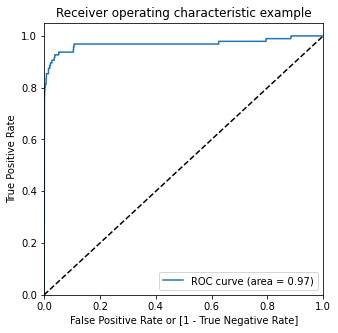

In [231]:
# Predicted probability
y_test_pred_proba = logistic_bal_smote_model.predict_proba(X_test)[:,1]

test_pred_smote()
    
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### SMOTE - Logistic regression Model Summary

- Train data                       
  - Accuracy    =  0.95                 
  - Sensitivity =  0.92
  - Specifivty  =  0.97
  - F1-Score    =  0.95
  - ROC         =  0.99

- Test data                       
  - Accuracy    =  0.97                   
  - Sensitivity =  0.89
  - Specifivty  =  0.97
  - F1-Score    =  0.10
  - ROC         =  0.97

##### Decision Tree

In [232]:
# Lets create param grid with default values and find best grid searcg best estimators
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

Fitting 3 folds for each of 8 candidates, totalling 24 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,8.057353,0.042360,0.110744,0.068255,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.986127,0.985690,0.984839,0.985552,0.000535,5
1,7.689002,0.255144,0.072913,0.007355,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 100}",0.986127,0.985688,0.984839,0.985551,0.000535,6
2,7.840273,0.070778,0.070501,0.000947,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 50}",0.986088,0.985635,0.984773,0.985499,0.000546,7
3,7.542168,0.018233,0.078098,0.000030,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 100}",0.986062,0.985639,0.984771,0.985491,0.000537,8
4,14.214907,0.561190,0.116604,0.054710,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.998098,0.998154,0.998021,0.998091,0.000055,2
5,14.320845,0.327783,0.072917,0.007359,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 100}",0.998119,0.998132,0.998031,0.998094,0.000045,1
6,14.056962,0.312845,0.109363,0.066265,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 50}",0.998105,0.998080,0.997907,0.998031,0.000088,4
7,14.271621,0.307427,0.078334,0.000346,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 100}",0.998081,0.998094,0.997934,0.998036,0.000073,3


In [233]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9980942341818416
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [234]:
# Model with optimal hyperparameters
dt_bal_smote_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_bal_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

In [235]:
# Predictions on the train set
y_train_pred = dt_bal_smote_model.predict(X_train_smote)

[[223809   3640]
 [  2374 225075]]
Accuracy:- 0.9867794538555896
Sensitivity:- 0.9895624953286232
Specificity:- 0.9839964123825561
F1-Score:- 0.9868161450706324
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    227449
           1       0.98      0.99      0.99    227449

    accuracy                           0.99    454898
   macro avg       0.99      0.99      0.99    454898
weighted avg       0.99      0.99      0.99    454898

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    227449
           1       0.98      0.99      0.99    227449

    accuracy                           0.99    454898
   macro avg       0.99      0.99      0.99    454898
weighted avg       0.99      0.99      0.99    454898

roc_auc train score= 0.9986355757920081


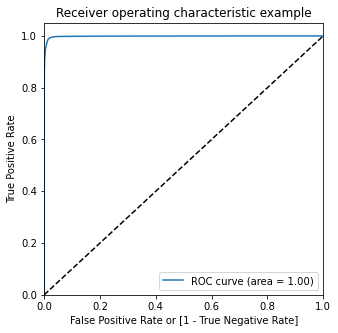

In [236]:
# Predicted probability
y_train_pred_proba = dt_bal_smote_model.predict_proba(X_train_smote)[:,1]

train_pred_smote()

# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

In [237]:
# Predictions on the test set
y_test_pred = dt_bal_smote_model.predict(X_test)

[[55852  1014]
 [   19    77]]
Accuracy:- 0.9818651030511569
Sensitivity:- 0.8020833333333334
Specificity:- 0.9821686069004326
F1-Score:- 0.12973883740522324
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.07      0.80      0.13        96

    accuracy                           0.98     56962
   macro avg       0.54      0.89      0.56     56962
weighted avg       1.00      0.98      0.99     56962

roc_auc test score= 0.8551876157692353


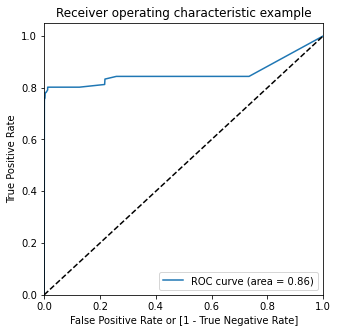

In [238]:
# Predicted probability
y_test_pred_proba = dt_bal_smote_model.predict_proba(X_test)[:,1]

test_pred_smote()

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### SMOTE - Decision Tree Model Summary

- Train data                       
  - Accuracy    =  0.99                 
  - Sensitivity =  0.99
  - Specifivty  =  0.98
  - F1-Score    =  0.99
  - ROC         =  1.00

- Test data                       
  - Accuracy    =  0.98                   
  - Sensitivity =  0.80
  - Specifivty  =  0.98
  - F1-Score    =  0.12
  - ROC         =  0.86

##### Random forest

For this one we are getting high calculation memory and it is getting flushed. We could see this didnt performed well with original dataset (imbalanced) and henceforth with manuafactured data set (balanced approach) we could not get confidence as this may or may not give good prediction compare to the earlier imbalanced data set. Henceoforth I am intentially not running this. We will skip the modeling for now.

##### XGBoost

In [244]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_smote, y_train_smote) 
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[13:34:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:35:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:36:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:37:54]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,66.566551,12.729037,0.677095,0.577531,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999645,0.999753,0.999685,0.999694,0.000045,4,0.999718,0.999736,0.999720,0.999725,0.000008
1,77.171429,0.083576,0.232590,0.010905,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999671,0.999738,0.999652,0.999687,0.000037,5,0.999733,0.999731,0.999697,0.999721,0.000017
2,95.324804,2.576897,0.239530,0.007365,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999665,0.999735,0.999648,0.999683,0.000038,6,0.999720,0.999723,0.999720,0.999721,0.000001
3,56.552668,0.590506,0.270798,0.073681,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999956,0.999950,0.999953,0.999953,0.000002,3,0.999979,0.999972,0.999977,0.999976,0.000003
4,76.675416,0.345060,0.239083,0.006736,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999953,0.999962,0.999959,0.999958,0.000004,2,0.999980,0.999981,0.999984,0.999982,0.000002
5,94.230038,2.948054,0.266166,0.055316,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999970,0.999958,0.999951,0.999960,0.000008,1,0.999985,0.999981,0.999977,0.999981,0.000003


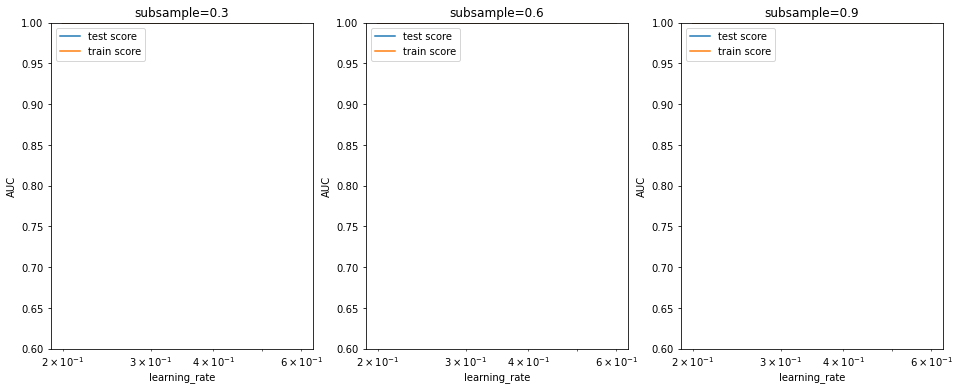

In [245]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [246]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [247]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_smote_model = XGBClassifier(params = params)
xgb_bal_smote_model.fit(X_train_smote, y_train_smote)

[14:02:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:03:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [248]:
# Predictions on the train set
y_train_pred = xgb_bal_smote_model.predict(X_train_smote)

[[227447      2]
 [     0 227449]]
Accuracy:- 0.9999956034099952
Sensitivity:- 1.0
Specificity:- 0.9999912068199904
F1-Score:- 0.9999956034293251
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898

roc_auc train score= 1.0


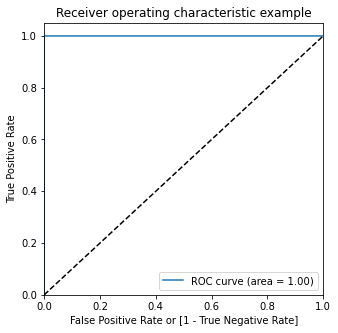

In [249]:
# Predicted probability
y_train_pred_proba = xgb_bal_smote_model.predict_proba(X_train_smote)[:,1]

train_pred_ros()

# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

In [250]:
# Predictions on the test set
y_test_pred = xgb_bal_smote_model.predict(X_test)

[[56839    27]
 [   20    76]]
Accuracy:- 0.9991748885221726
Sensitivity:- 0.7916666666666666
Specificity:- 0.9995251995920234
F1-Score:- 0.7638190954773869
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.74      0.79      0.76        96

    accuracy                           1.00     56962
   macro avg       0.87      0.90      0.88     56962
weighted avg       1.00      1.00      1.00     56962

roc_auc test score= 0.9618437789423088


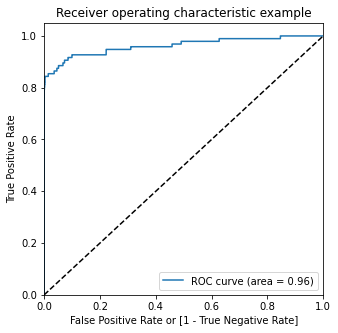

In [251]:
# Predicted probability
y_test_pred_proba = xgb_bal_smote_model.predict_proba(X_test)[:,1]

test_pred_ros()

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### SMOTE - XGBoost Model Summary

- Train data                       
  - Accuracy    =  1.00                 
  - Sensitivity =  1.00
  - Specifivty  =  1.00
  - F1-Score    =  1.00
  - ROC         =  1.00

- Test data                       
  - Accuracy    =  1.00                   
  - Sensitivity =  0.79
  - Specifivty  =  1.00
  - F1-Score    =  0.76
  - ROC         =  0.96

## AdaSyn (Adaptive Synthetic Sampling)
- Logistic regression
- Decision Tree
- Random forest
- XGBoost

In [252]:
# Importing adasyn
from imblearn.over_sampling import ADASYN

In [253]:
# Instantiate adasyn
ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

print('Before sampling class distribution:-',Counter(y_train))

print('New class distribution:-',Counter(y_train_adasyn))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 227449, 1: 227448})


##### Logistic regression

In [254]:
# Creating K-Fold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

# Lets take default values
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [255]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.336506,0.606944,0.177039,0.082980,0.01,{'C': 0.01},0.963472,0.962327,0.963273,0.963024,0.000499,6,0.962770,0.963211,0.963172,0.963051,0.000199
1,2.205010,0.132636,0.083510,0.006549,0.1,{'C': 0.1},0.963578,0.962435,0.963370,0.963128,0.000497,5,0.962881,0.963305,0.963272,0.963153,0.000192
2,2.042559,0.141107,0.119116,0.048481,1,{'C': 1},0.963585,0.962442,0.963376,0.963134,0.000497,4,0.962890,0.963312,0.963278,0.963160,0.000191
3,2.011219,0.133762,0.093998,0.011480,10,{'C': 10},0.963585,0.962443,0.963377,0.963135,0.000496,3,0.962891,0.963312,0.963279,0.963161,0.000191
4,2.081700,0.139803,0.080637,0.007447,100,{'C': 100},0.963585,0.962443,0.963377,0.963135,0.000496,2,0.962891,0.963312,0.963279,0.963161,0.000191
5,2.204092,0.176599,0.074786,0.004377,1000,{'C': 1000},0.963585,0.962443,0.963377,0.963135,0.000496,1,0.962891,0.963312,0.963279,0.963161,0.000191


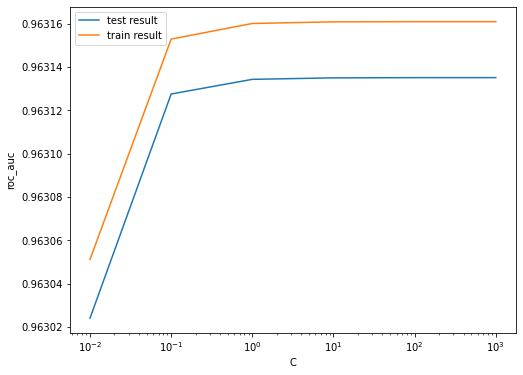

In [256]:
# Lets plot versus train and validation scores for C values

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [257]:
# Lets see with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9631351482818916 at C = 1000


In [258]:
# Instantiate the model with best C
logistic_bal_adasyn = LogisticRegression(C=1000)

In [259]:
# Fit the model on the train set
logistic_bal_adasyn_model = logistic_bal_adasyn.fit(X_train_adasyn, y_train_adasyn)

In [260]:
def train_pred_adasyn():
    # Confusion matrix
    confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
    print(confusion)
    
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    # Accuracy
    print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

    # Sensitivity
    print("Sensitivity:-",TP / float(TP+FN))

    # Specificity
    print("Specificity:-", TN / float(TN+FP))

    # F1 score
    print("F1-Score:-", f1_score(y_train_adasyn, y_train_pred))

    # classification_report
    print(classification_report(y_train_adasyn, y_train_pred))

    # roc_auc
    auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
    print("roc_auc train score=", auc)
    return None

In [261]:
def test_pred_adasyn():
    # Confusion matrix
    confusion = metrics.confusion_matrix(y_test, y_test_pred)
    print(confusion)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    # Accuracy
    print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

    # Sensitivity
    print("Sensitivity:-",TP / float(TP+FN))

    # Specificity
    print("Specificity:-", TN / float(TN+FP))

    # F1 score
    print("F1-Score:-", f1_score(y_test, y_test_pred))

    # classification_report
    print(classification_report(y_test, y_test_pred))
    # roc_auc
    auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
    print("roc_auc test score=", auc)
    return None

In [262]:
# Predictions on the train set
y_train_pred = logistic_bal_adasyn_model.predict(X_train_adasyn)

[[207019  20430]
 [ 31286 196162]]
Accuracy:- 0.8863127257379143
Sensitivity:- 0.862447680348915
Specificity:- 0.9101776662020936
F1-Score:- 0.8835330150436899
              precision    recall  f1-score   support

           0       0.87      0.91      0.89    227449
           1       0.91      0.86      0.88    227448

    accuracy                           0.89    454897
   macro avg       0.89      0.89      0.89    454897
weighted avg       0.89      0.89      0.89    454897

roc_auc train score= 0.9631610161614914


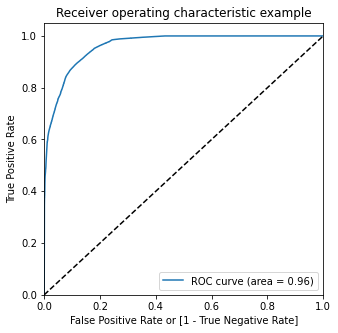

In [263]:
# Predicted probability
y_train_pred_proba = logistic_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

train_pred_adasyn()

# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [264]:
# Prediction on the test set
y_test_pred = logistic_bal_adasyn_model.predict(X_test)

[[51642  5224]
 [    4    92]]
Accuracy:- 0.9082195147642288
Sensitivity:- 0.9583333333333334
Specificity:- 0.9081349136566665
F1-Score:- 0.03399852180339985
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56866
           1       0.02      0.96      0.03        96

    accuracy                           0.91     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.91      0.95     56962

roc_auc test score= 0.9671573487086602


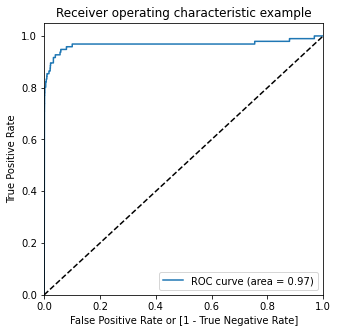

In [265]:
# Predicted probability
y_test_pred_proba = logistic_bal_adasyn_model.predict_proba(X_test)[:,1]

test_pred_adasyn()

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### adasyn - Logistic Regression Model Summary

- Train data                       
  - Accuracy    =  0.89                 
  - Sensitivity =  0.86
  - Specifivty  =  0.91
  - F1-Score    =  0.88
  - ROC         =  0.96

- Test data                       
  - Accuracy    =  0.91                  
  - Sensitivity =  0.96
  - Specifivty  =  0.91
  - F1-Score    =  0.34
  - ROC         =  0.97

##### Decision Tree

In [266]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

Fitting 3 folds for each of 8 candidates, totalling 24 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,8.909888,0.198232,0.120773,0.065499,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.902958,0.920355,0.909339,0.910884,0.007186,7
1,8.089211,0.394346,0.077295,0.011764,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 100}",0.902958,0.920355,0.909332,0.910882,0.007186,8
2,8.471584,0.576048,0.075683,0.003444,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 50}",0.902958,0.920316,0.912920,0.912065,0.007112,6
3,7.482541,0.092267,0.072905,0.007356,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 100}",0.902958,0.920310,0.913996,0.912421,0.007171,5
4,13.512271,0.714874,0.078345,0.000336,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.934002,0.946317,0.938384,0.939568,0.005097,3
5,14.806823,1.062837,0.146768,0.086260,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 100}",0.933860,0.945149,0.935908,0.938306,0.004911,4
6,20.836107,4.480591,0.095737,0.024928,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 50}",0.936263,0.945162,0.939398,0.940274,0.003685,2
7,16.197647,0.962441,0.224841,0.218605,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 100}",0.936197,0.947140,0.942633,0.941990,0.004490,1


In [267]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9419900032003635
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)


In [268]:
# Model with optimal hyperparameters
dt_bal_adasyn_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=100)

In [269]:
# Predictions on the train set
y_train_pred = dt_bal_adasyn_model.predict(X_train_adasyn)

[[215929  11520]
 [  1118 226330]]
Accuracy:- 0.9722178866864367
Sensitivity:- 0.9950845907636031
Specificity:- 0.9493512831447929
F1-Score:- 0.9728389118371453
              precision    recall  f1-score   support

           0       0.99      0.95      0.97    227449
           1       0.95      1.00      0.97    227448

    accuracy                           0.97    454897
   macro avg       0.97      0.97      0.97    454897
weighted avg       0.97      0.97      0.97    454897

roc_auc train score= 0.9917591040224101


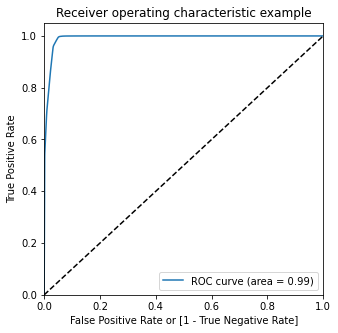

In [270]:
# Predicted probability
y_train_pred_proba = dt_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

train_pred_adasyn()

# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [271]:
# Predictions on the test set
y_test_pred = dt_bal_adasyn_model.predict(X_test)

[[53880  2986]
 [   15    81]]
Accuracy:- 0.9473157543625575
Sensitivity:- 0.84375
Specificity:- 0.9474905919178419
F1-Score:- 0.05121719886184002
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56866
           1       0.03      0.84      0.05        96

    accuracy                           0.95     56962
   macro avg       0.51      0.90      0.51     56962
weighted avg       1.00      0.95      0.97     56962

roc_auc test score= 0.9141440147305362


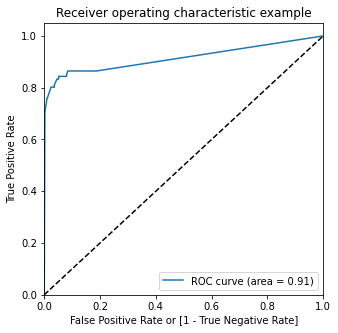

In [272]:
# Predicted probability
y_test_pred_proba = dt_bal_adasyn_model.predict_proba(X_test)[:,1]

test_pred_adasyn()

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### adasyn - Decision Tree Model Summary

- Train data                       
  - Accuracy    =  0.97                 
  - Sensitivity =  0.95
  - Specifivty  =  0.95
  - F1-Score    =  0.97
  - ROC         =  0.99

- Test data                       
  - Accuracy    =  0.95                  
  - Sensitivity =  0.84
  - Specifivty  =  0.95
  - F1-Score    =  0.51
  - ROC         =  0.91

##### Random forest

For this one we are getting high calculation memory and it is getting flushed. We could see this didnt performed well with original dataset (imbalanced) and henceforth with manuafactured data set (balanced approach) we could not get confidence as this may or may not give good prediction compare to the earlier imbalanced data set. Henceoforth I am intentially not running this. We will skip the modeling for now.

##### XGBoost

In [273]:
# hyperparameter tuning with XGBoost

# creating a K-Fold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn) 

# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[16:12:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:13:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:14:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:15:44]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,63.250477,3.445988,0.234188,0.011056,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.975756,0.996202,0.994729,0.988896,0.009310,5,0.999304,0.999014,0.999315,0.999211,0.000139
1,74.460402,0.483085,0.234321,0.000001,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.978500,0.996075,0.993204,0.989260,0.007698,3,0.999295,0.999072,0.999224,0.999197,0.000093
2,89.715179,0.283043,0.223907,0.007363,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.977110,0.996104,0.993729,0.988981,0.008450,4,0.999300,0.999069,0.999194,0.999188,0.000095
3,53.101322,0.455903,0.223907,0.007363,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.979173,0.998146,0.998145,0.991822,0.008944,1,0.999937,0.999934,0.999942,0.999938,0.000004
4,74.145546,0.635661,0.249940,0.033747,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.971621,0.996825,0.997548,0.988664,0.012055,6,0.999950,0.999942,0.999947,0.999946,0.000003
5,87.282004,2.011976,0.245074,0.015209,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.977355,0.998183,0.995571,0.990370,0.009265,2,0.999953,0.999935,0.999955,0.999948,0.000009


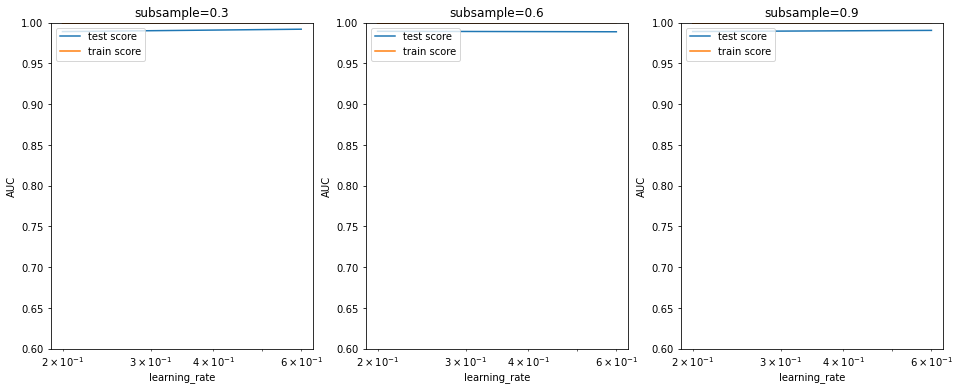

In [274]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [275]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.3}

In [276]:
# chosen hyperparameters

params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_adasyn_model = XGBClassifier(params = params)
xgb_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

[16:39:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:39:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [277]:
# Predictions on the train set
y_train_pred = xgb_bal_adasyn_model.predict(X_train_adasyn)

[[227447      2]
 [     0 227448]]
Accuracy:- 0.9999956034003302
Sensitivity:- 1.0
Specificity:- 0.9999912068199904
F1-Score:- 0.9999956034099953
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227448

    accuracy                           1.00    454897
   macro avg       1.00      1.00      1.00    454897
weighted avg       1.00      1.00      1.00    454897

roc_auc train score= 1.0


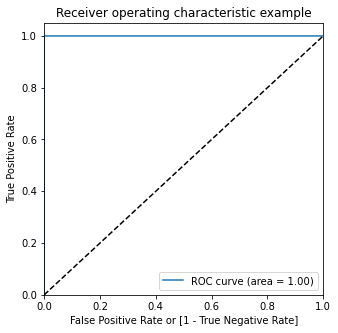

In [278]:
# Predicted probability
y_train_pred_proba = xgb_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

train_pred_adasyn()

# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [279]:
# Predictions on the test set
y_test_pred = xgb_bal_adasyn_model.predict(X_test)

[[56825    41]
 [   21    75]]
Accuracy:- 0.9989115550718023
Sensitivity:- 0.78125
Specificity:- 0.9992790067878873
F1-Score:- 0.7075471698113208
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.65      0.78      0.71        96

    accuracy                           1.00     56962
   macro avg       0.82      0.89      0.85     56962
weighted avg       1.00      1.00      1.00     56962

roc_auc test score= 0.9599176499724499


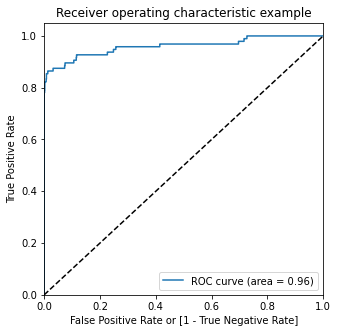

In [280]:
# Predicted probability
y_test_pred_proba = xgb_bal_adasyn_model.predict_proba(X_test)[:,1]

test_pred_adasyn()

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### adasyn - XGBoost Model Summary

- Train data                       
  - Accuracy    =  1.00                 
  - Sensitivity =  1.00
  - Specifivty  =  1.00
  - F1-Score    =  1.00
  - ROC         =  1.00

- Test data                       
  - Accuracy    =  1.00                  
  - Sensitivity =  0.78
  - Specifivty  =  1.00
  - F1-Score    =  0.70
  - ROC         =  0.96


#### <font color = red> Milestone step 8  <font> - `Choosing best model on the balanced data`



You might now be fully understand the flow we applied to identify the best model. We initiatlly did executed 4 apraoch of data balancing and these are most generic and proven approach, those were Undersampling , Oversampling, SMOTE and AdaSyn.

We did tred to guage all our machnine learning model which we executed with imbalanced dataset , Logistic Regression, Decision Tree , Random Forest and XGBoost. However these all models were quite good against balanced data set, and did good prediction on both train and test data set, however a marginal benefit will make huge profit to the bank so we always try to choose best model, even 1% larger will reduce alot of cost.

Henceforth looking into undersampling and oversampling balancing technique could not be guage in comparision with rest two technique SMOTE and AdaSyn , therefore we choosed these two apraoch as the finalist to do minute comparision. 

In SMOTE and AdaSyn we could see Decision Tree and Random Forest performed not very well in imbalanced dataset and same in the balanced data set technique, henceforth we left with below 4 combination.

- SMOTE - Logistic regression Model Summary   - ROC Training (99%) , test (97%)
- SMOTE - XGBoost Model Summary       - ROC Training (100%) , test (96%)
- AdaSyn - Logistic Regression Model Summary    - ROC Training (96%) , test (97%)
- AdaSyn - XGBoost Model Summary     - ROC Training (100%) , test (96%)

Now we read the Train and test %, which we could see 97% is highest for test but `SMOTE - Logistic regression Model Summary ` could be consider as good result considering difference in % for train and test is minimal. So finally the best model is `SMOTE - Logistic regression Model Summary `

### Print the FPR,TPR & select the best threshold from the roc curve for the best model

In [281]:
print('Train auc =', metrics.roc_auc_score(y_train_smote, y_train_pred_proba_log_bal_smote))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, y_train_pred_proba_log_bal_smote)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 0.9897539730968845
Threshold= 0.531156361351181


We can see that the threshold is 53.1%, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.

#### <font color = red> Milestone step 9  <font> - `Business Summary Report`

##### Analytics summary and theory
We tried to build several models and they are divided into two parts, one with Imbalanced dataset ( Original dataset) and another with balancing the dataset (manufactured dataset). The reason why we need to perform dataset is due to there was huge gap with the fraud and non fraud data henceforth if we do not balanced them thn there high chances that our machine learning algorith will also read false positive and make it almost 100% prediction which is in actual incorrect prediction.

While we finalized our best model we need to consider few things and this is important to take in consideration
- Infrastructure required
- Resources required
- Computational power to run the model
- Cost of deployment
- Simpler and easy to interpret 

These above features are very much needed when we deleiver any model to client. Intially we drafted 6 model however we saw KNN and SVM required huge computational power and memory, so considering this as capstone project and we have already better model with almost near to 99% prediction is fair enough to demostrate to the business.

We also guage little change in ROC score could potentially impacted the monentary charge / gain to the bank, and ofcourse if there are larger bandwdith of amount then we could consider more complex model with little higher cost. Henceforth this need to decide case by case.

#### Final summary report to business
From the analysis we conclude;

- For smaller average Transaction value :- We would like to be high precision value (Type 1 error) so that we can detect more True positive and less False Positive. This will help to tag relevant transaction as fraudent, and with less number of fraudent tag we can involved human or customer execute to verify by calling to customer, and lets assume precision is low which mean quite a number of breaks will appear and this will be add ons to customer execute to call them to identify / confirm the fraudent transaction which mean quite a number of effort / cost will be involved.


- For larger transaction value - Lets assume recall is low (Sensitivity, which mean type 2 errors) this will mean Flase negative is high and henceforth bank need to bear the loss as they failed to detect fraudent transaction, and henceforth to save the banks we must ensure recall should be high, this will save the bank from monetary / regulatory penalty loss.


Now with considering these two points in mind we also need to ensure cost vs benefit also need to be consider for better optmised model delievery. So I proposed;

ROC result with 1% better could potentially give quite a huge savings to the bank, and this will atleast either detect the fraud or minimise the error in detecting, and in both case this will save montery loss.

`Balance dataset` with `SMOTE technique` and `logistic regression` which is having `very good ROC` and have `high recall`. And also its simplest and easier to interpret to business, henceforth I am suggesting model with Balanace data set SMOTE technique Logistic regression as final solution.



## <font color="green">========================================================================== </font>
## <center> <font color="blue">                       End of the Capstone project , thank you                     </font> </center>
## <font color="green">========================================================================== </font>